# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [96]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.compat import lzip

## Loading the dataset

In [97]:
data=pd.read_csv("used_device_data.csv")
df=data.copy()
df.head().T

,0,1,2,3,4
brand_name,Honor,Honor,Honor,Honor,Honor
os,Android,Android,Android,Android,Android
screen_size,14.5,17.3,16.69,25.5,15.32
4g,yes,yes,yes,yes,yes
5g,no,yes,yes,yes,no
main_camera_mp,13.0,13.0,13.0,13.0,13.0
selfie_camera_mp,5.0,16.0,8.0,8.0,8.0
int_memory,64.0,128.0,128.0,64.0,64.0
ram,3.0,8.0,8.0,6.0,3.0
battery,3020.0,4300.0,4200.0,7250.0,5000.0


***OBSERVATION***
* There are  15 columns in the data set.

## Data Overview

- Observations
- Sanity checks

***starting with Observation***
- checking the shape, info, describe will provide the basic idea of the data set and the datatype in  15 columns
- we can find the mean and median for the number 

In [98]:
df.shape

(3454, 15)

***Observation***
- dataset has a shape of 3454 rows (observations) and 15 columns (features or variables)

In [99]:
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


***Observation***
- normalized_used_price,normalized_new_price are slightly normal distrubution. The mean and median value are slightly close.
- There are slightly skewness in the data.We can find out visualizing the data.
- screen_size,main_camera_mp,selfie_camera_mp,battery,weight, has more outliers. we can findout using the boxplot in the future investigation.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

***Observation***
- All the categorical are in objects and numerical are in int, float.
- There are some missing data we need to check and treat them accordingly.


#### checking for the missing data 

In [101]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

***Observation***
- Missing values in the dataset 
- main_camera_mp           179
- selfie_camera_mp           2
- int_memory                 4
- ram                        4
- battery                    6
- weight                     7
- Need to find the relation for the missing values and then do Miising value treatment

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Creating the function for the histplot and the boxplot to understand the each feature 
- Create the `def` the function name `histboxplot` and then create the subplots add the other parameters 

In [102]:
def hist_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

***Univariate analysis***
- For the numerical data we are visualizing with `histplot` and `boxplot` 

***Screen Size***

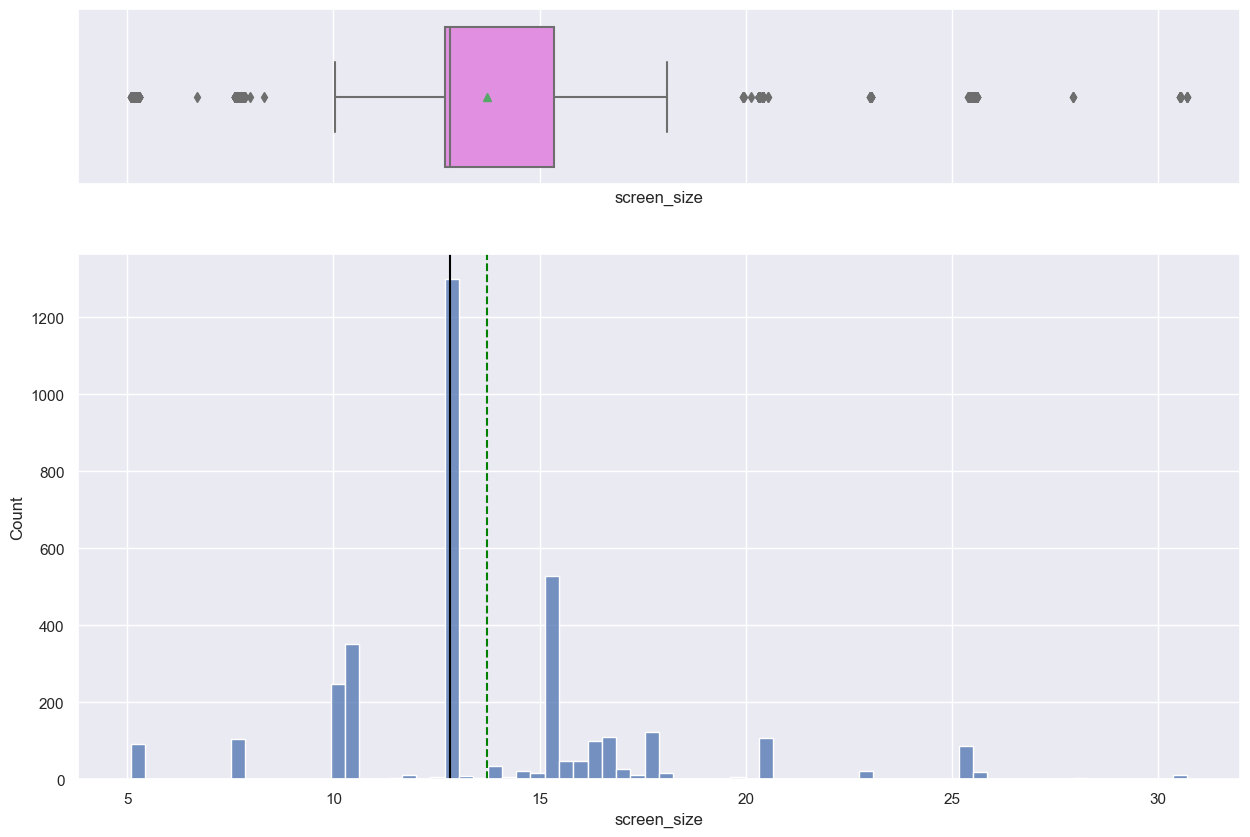

In [103]:
hist_boxplot(df,"screen_size");

***Observation*** 
- screen_size has outliers on lowerwhisker and higherwhisker and slightly normally distrubuted.
- median for the screen_size is around 12 and the mean lies around 13.
- screen_size doesnot have any clear pattern.

***Main_Camera_MP**

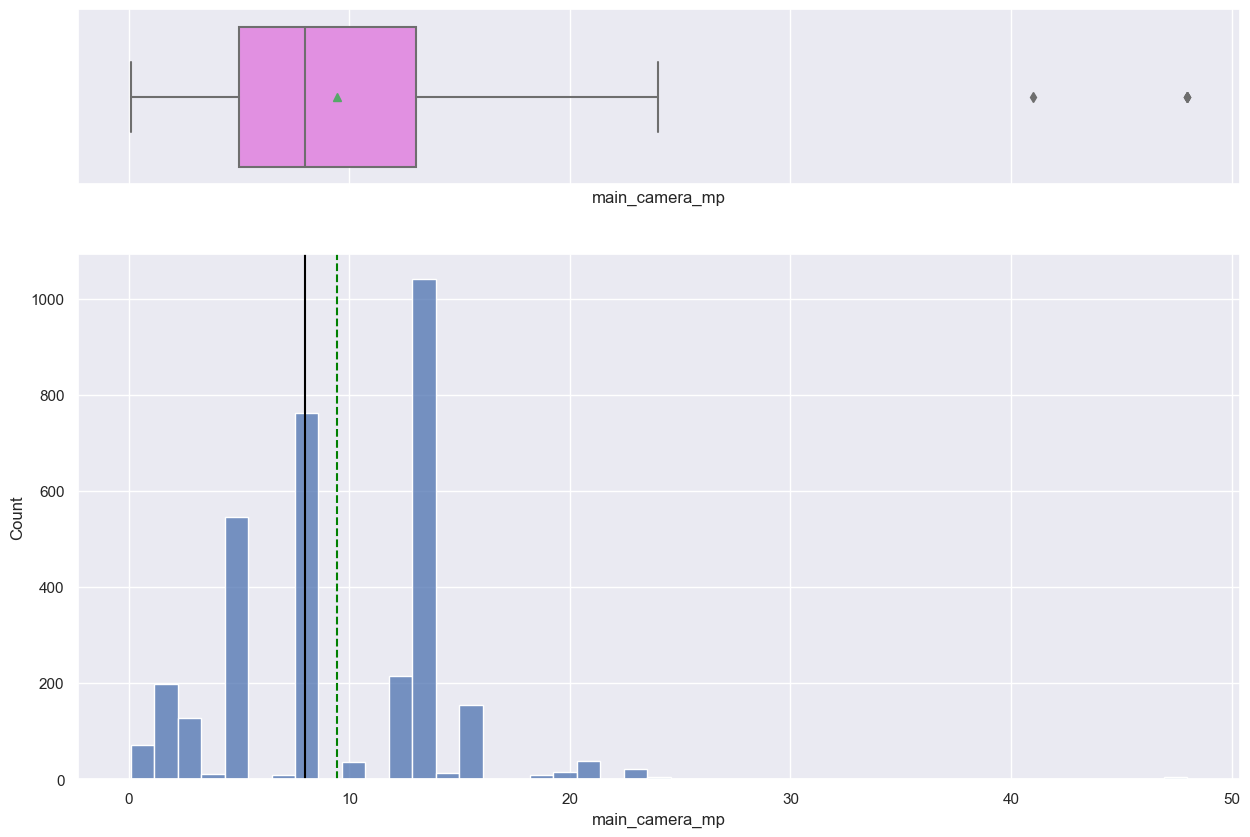

In [104]:
hist_boxplot(df,"main_camera_mp")

***Observation***
- main_camera_mp mean around 9.5MP and the median exactly 8.0MP
- There are cople of outliers at highwhisker
- Max main_camera_mp is at 48MP
- main_camera_mp is slightly skewed to left 

***selfie_camera_mp***

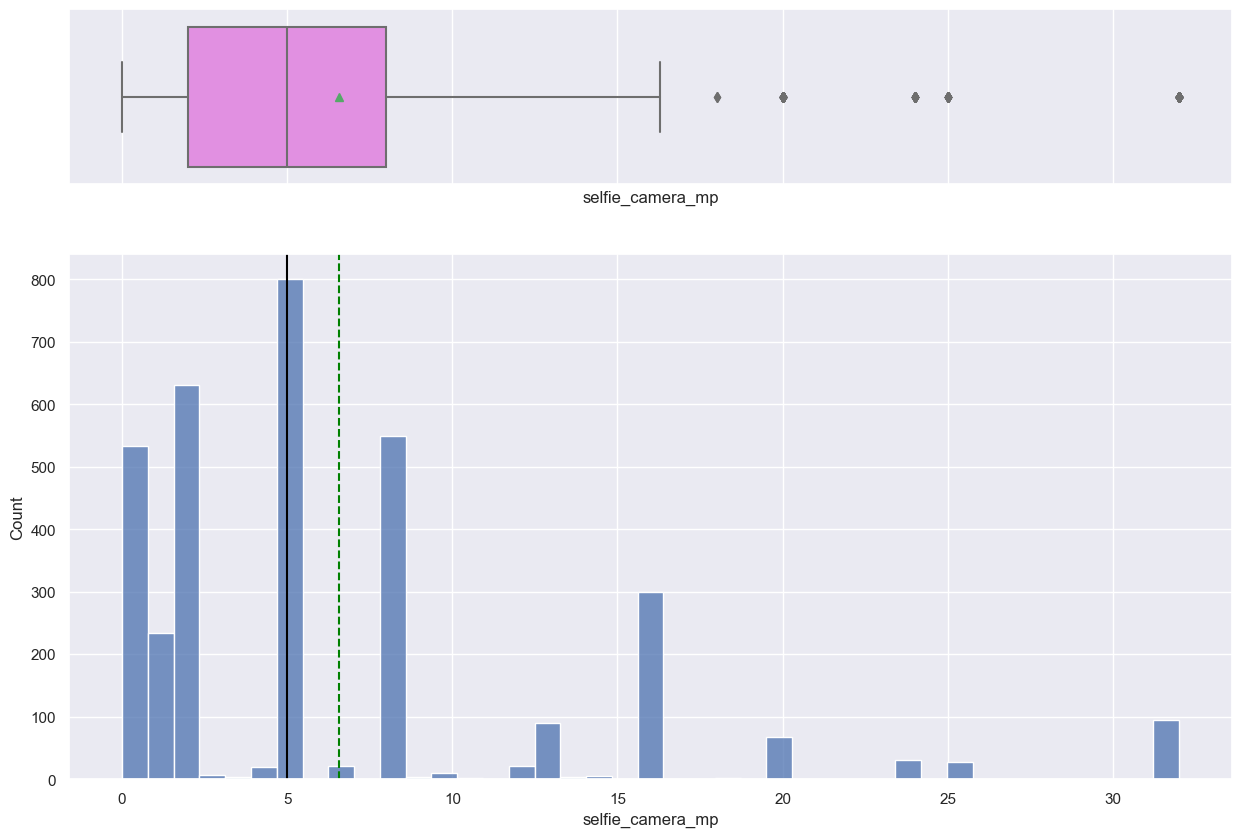

In [105]:
hist_boxplot(df,"selfie_camera_mp")

***Observation***
- selfie_camera_mp median value is 5MP
- selfie_camera_mp mean value is 6MP
- selfie_camera_mp max is 32MP
- selfie_camera_mp has outliers at higher whiskers and it is slightly right skewed

***int_memory***

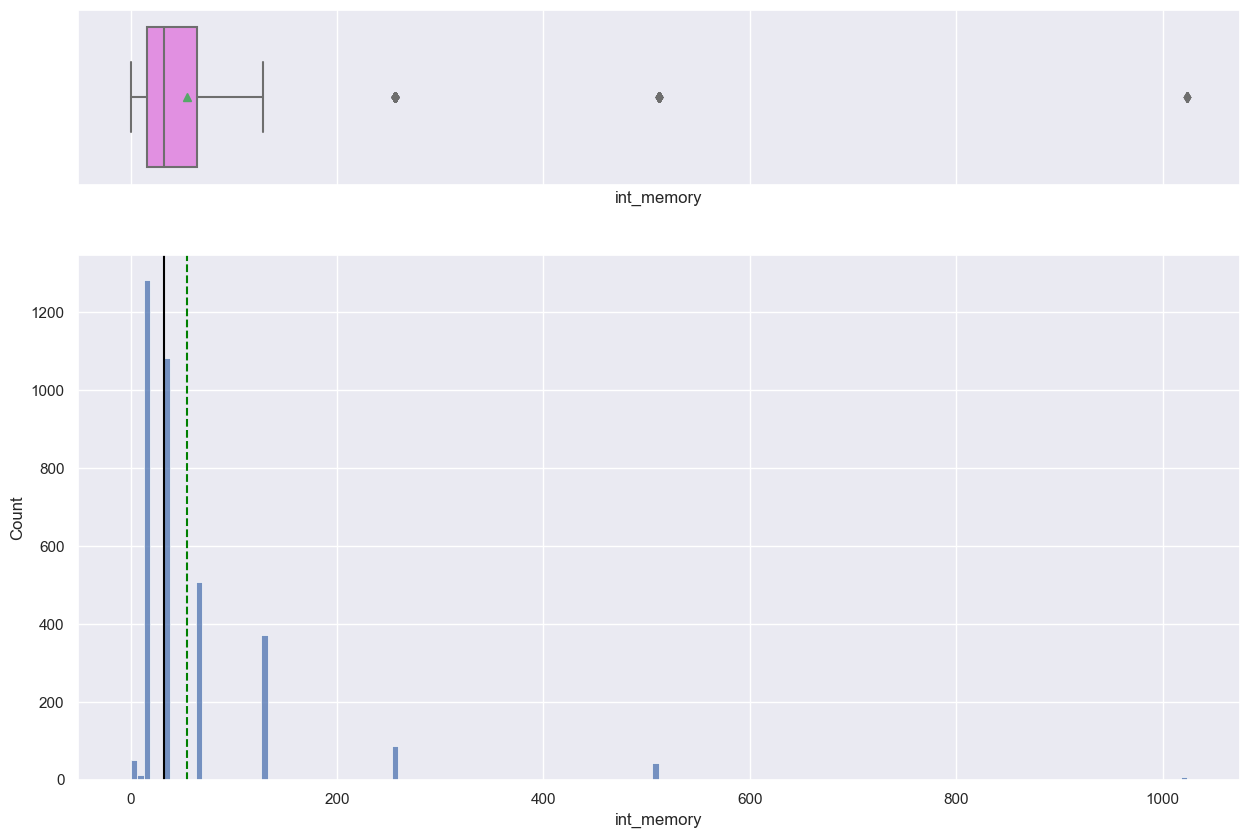

In [106]:
hist_boxplot(df,"int_memory")

***observation***
- int_memory is right skewed and there are couple outliers at highwhisker
- int_memory mean around 52GB and the median is 32GB
- int_memory max is 1200GB

***ram***

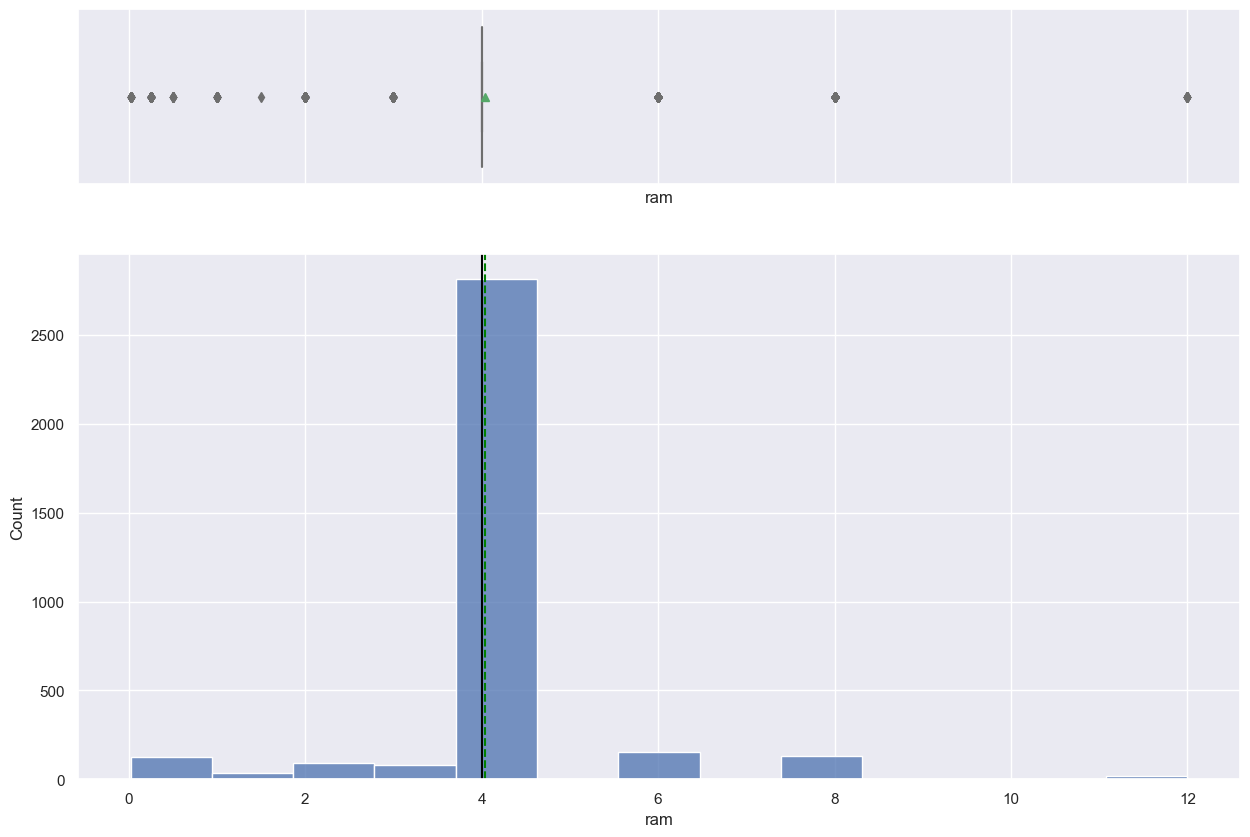

In [107]:
hist_boxplot(df,"ram")

***Observation***
- ram looks its discernable distribution, but there are outliears on both sides of whiskers. 
- ram mean and meadian at 4GB


***Battery***

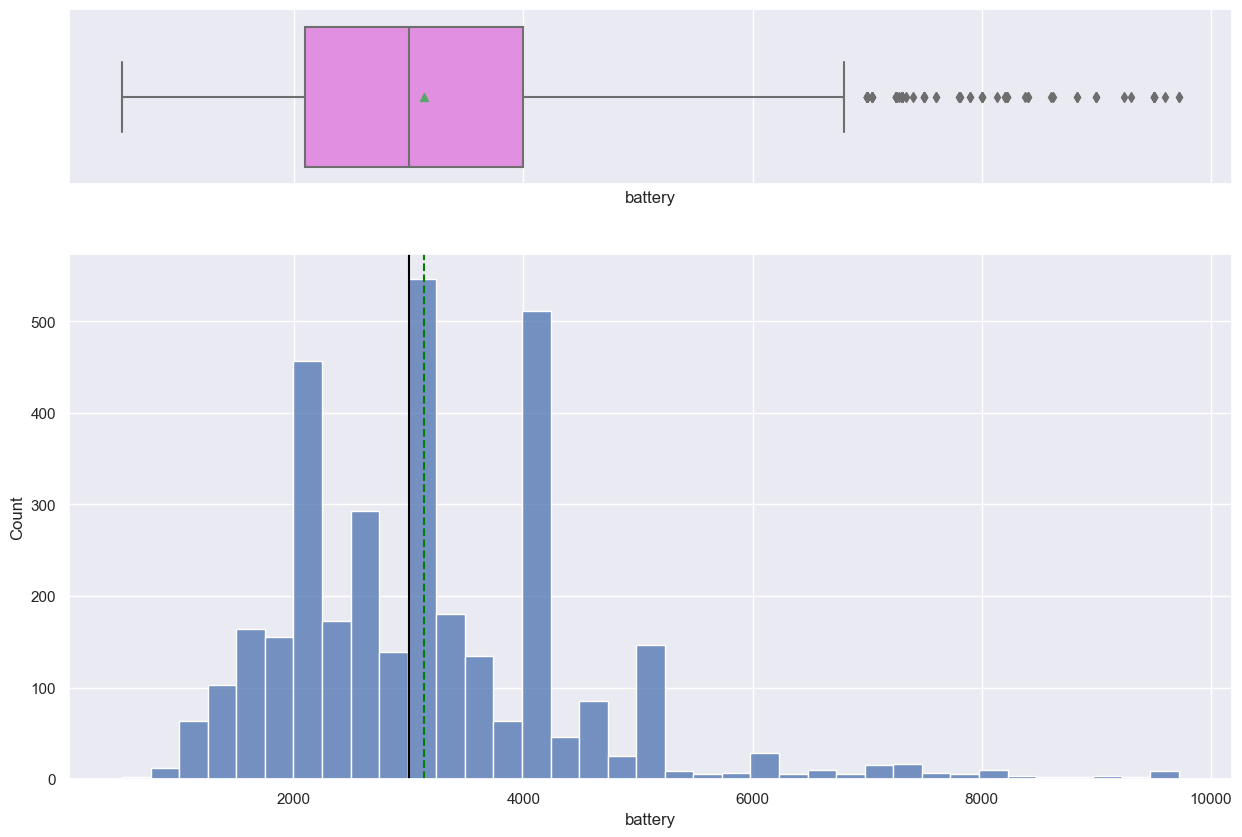

In [108]:
hist_boxplot(df,"battery")

***Observation***
- battery mean and median are around 3100 milliamperehours.
- battery is multimodal distribution with outliers on the higherwhiskers.
- battery max milliamperehours is around 9750

***weight***

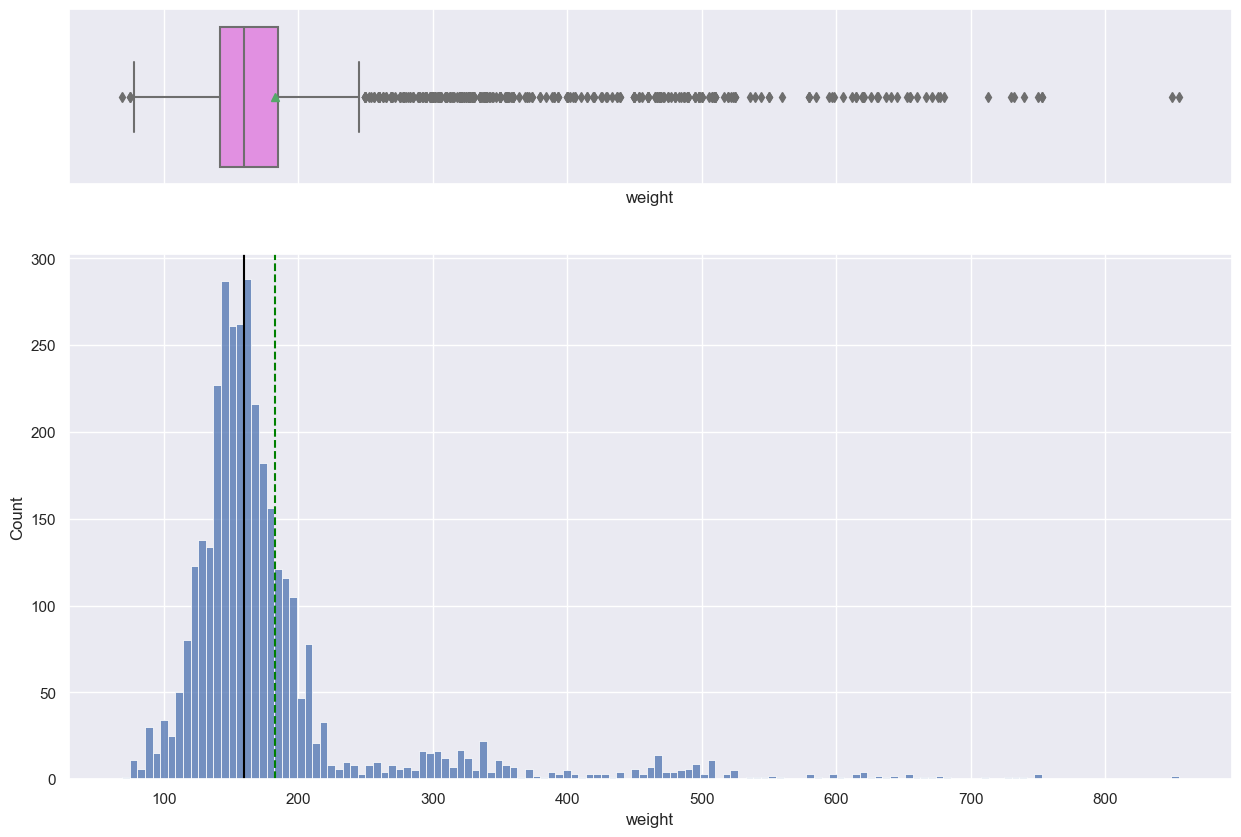

In [109]:
hist_boxplot(df,"weight")

***Observation***
- weight is right skewed, they are many outliers on the higherwhiskers and couple of them on the lowerwhiskers.
- weight mean 183 lbs and the median is at around 160lbs 

***release_year***

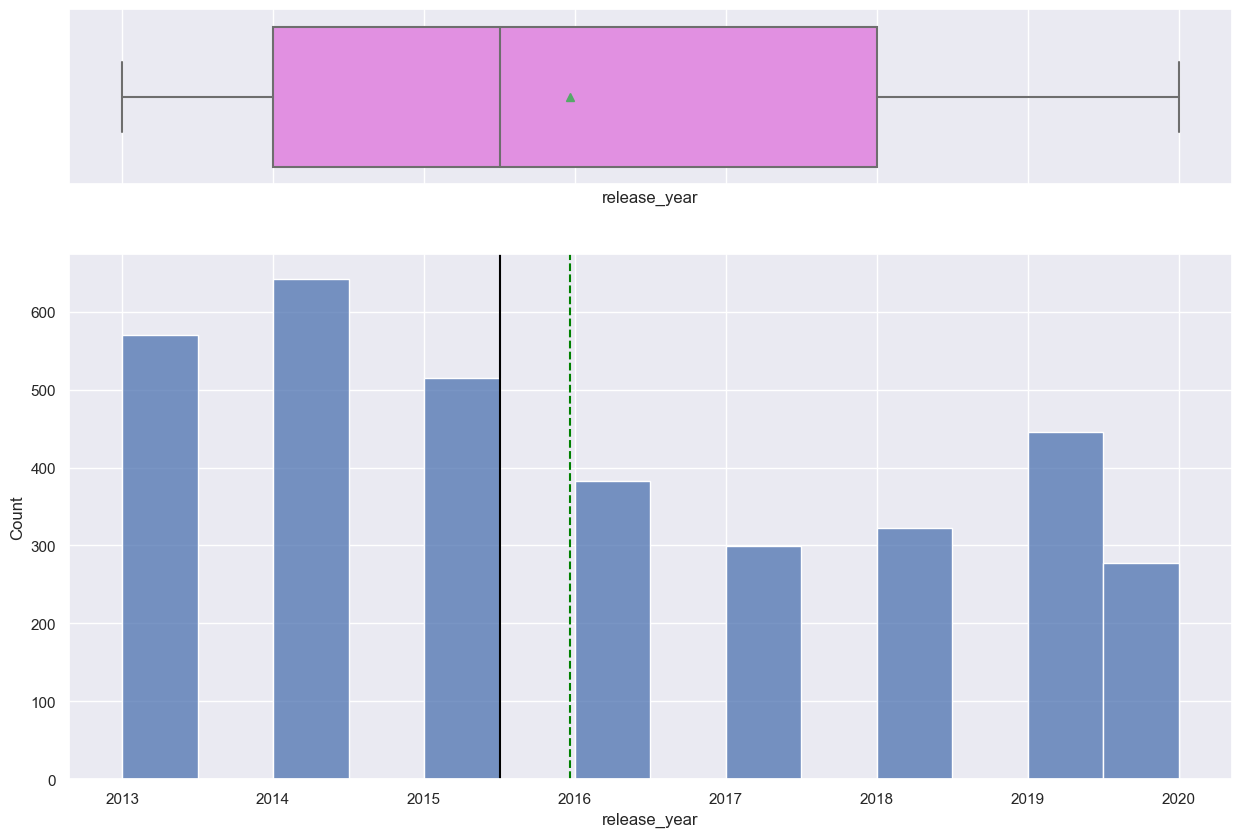

In [110]:
hist_boxplot(df,"release_year")

***Observation**
- release_year has multimodal distribution
- mean is near to 2016 and median is mid of 2015 and 2016 


***days_used***

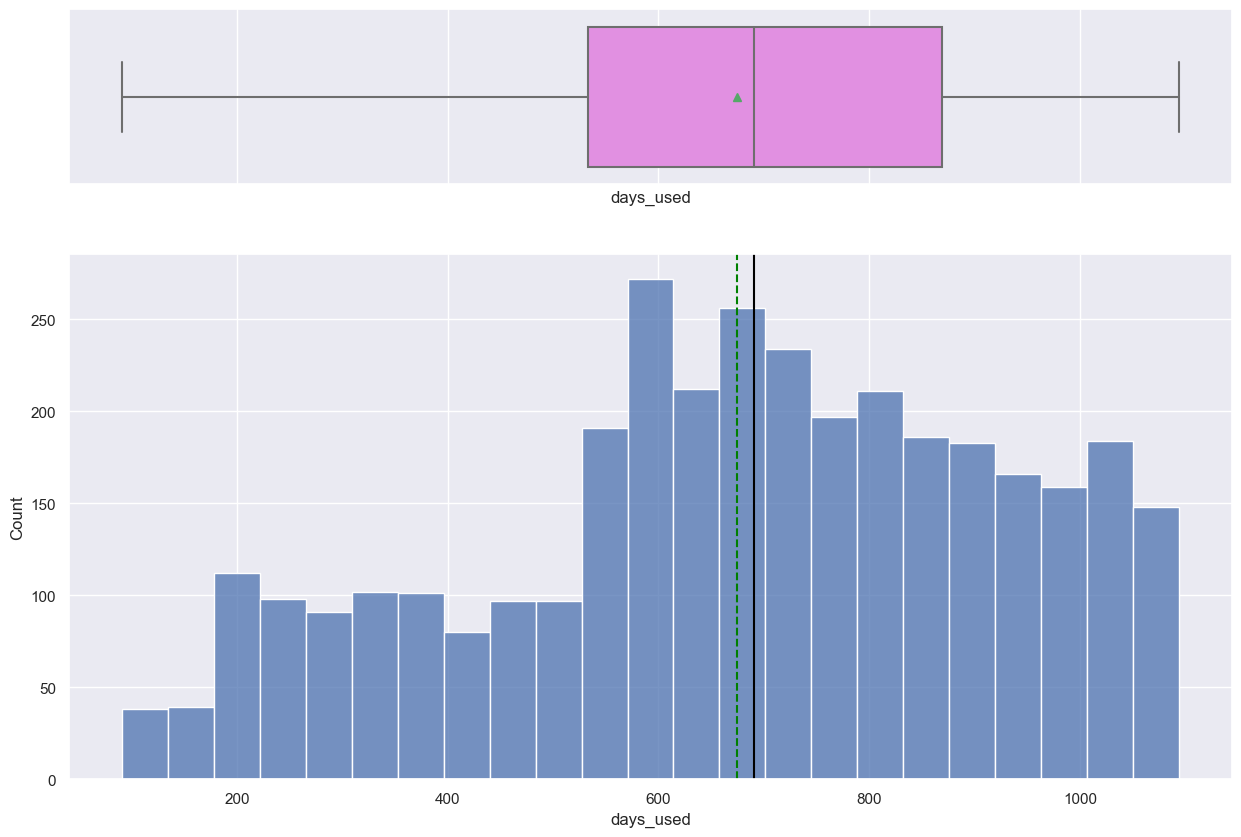

In [111]:
hist_boxplot(df,"days_used")

***Observation***
- days_used is slightly left skewed but there are no outliers 
- days_used the mean and median are around 700 days 

***normalized_used_price***
- 1. What does the distribution of normalized used device prices look like?

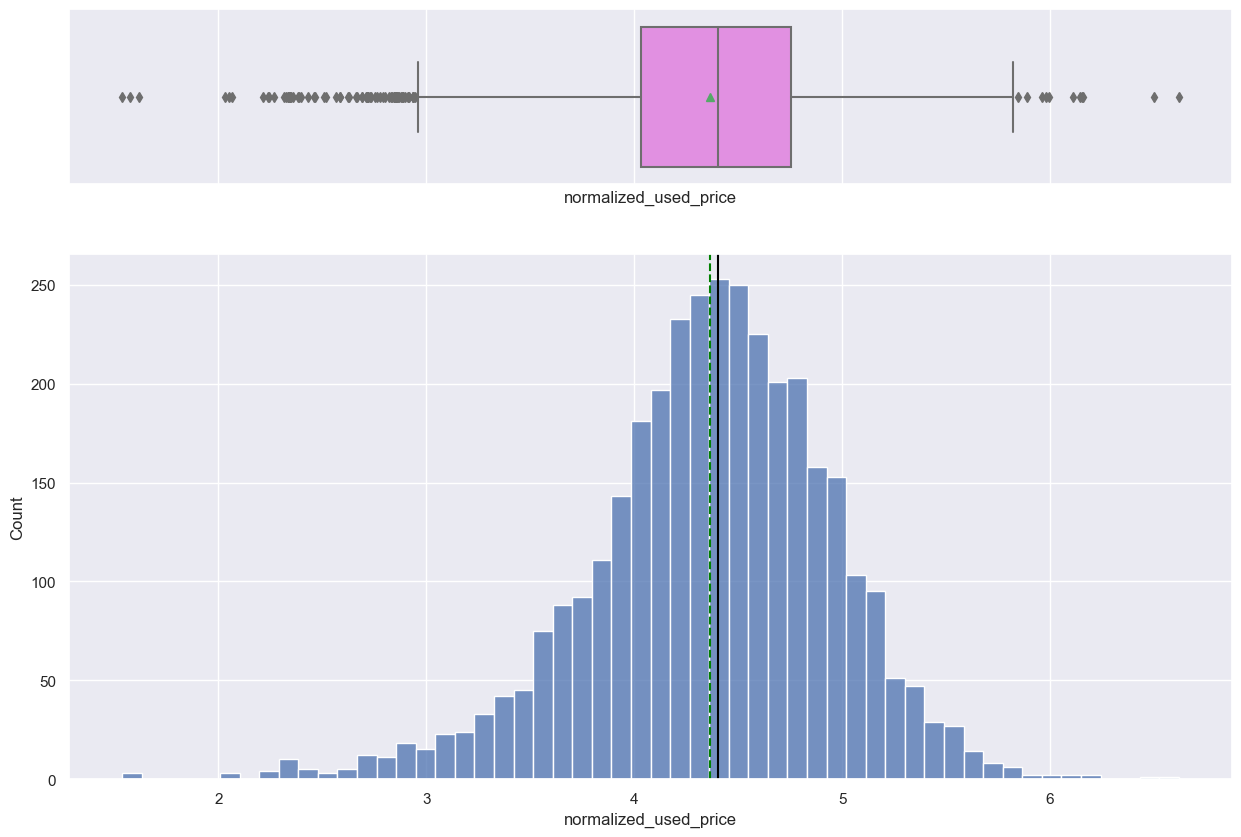

In [112]:
hist_boxplot(df,"normalized_used_price")

***Observation***
- The normalized_used_price looks slightly normally distrubuted.
- normalized_used_price is around 4.5 for the mean and median. 
- normalized_used_price has outliers on the both sides of whiskers. 


***normalized_new_price*

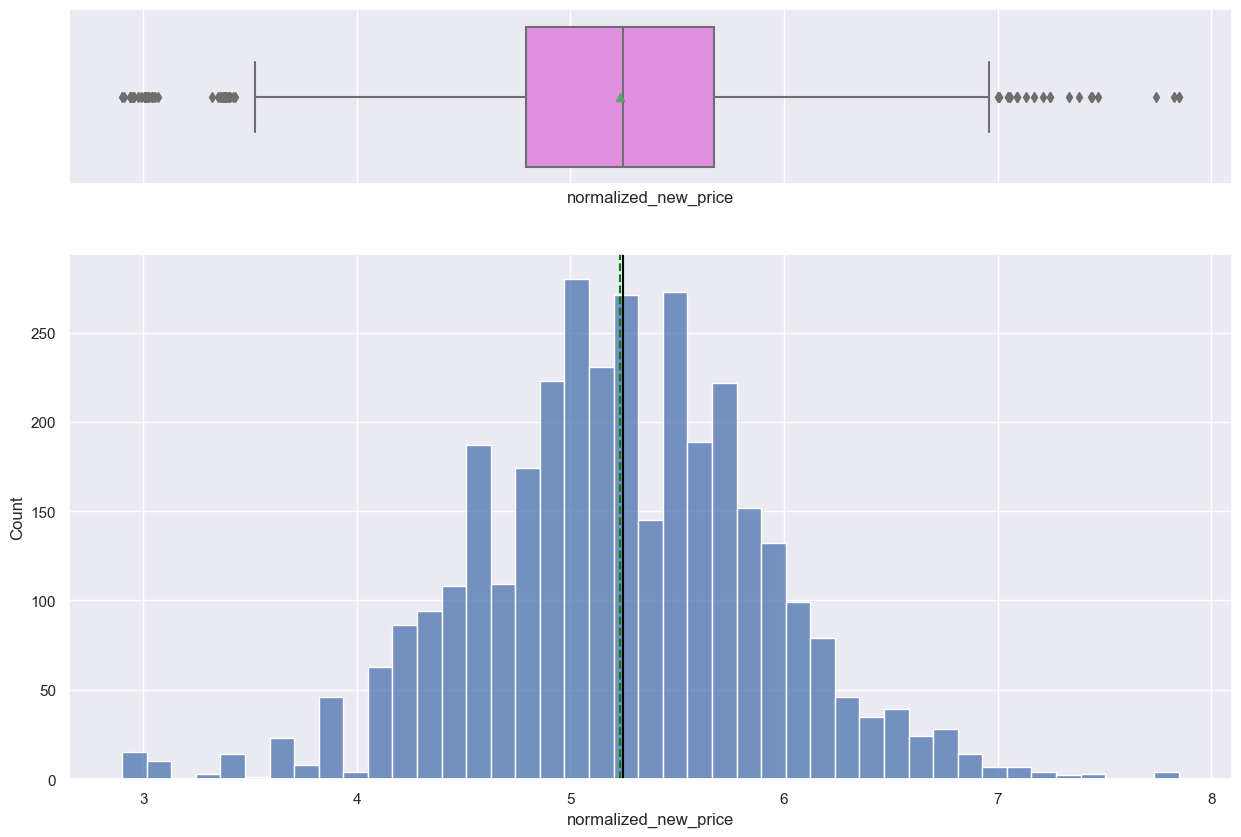

In [113]:
hist_boxplot(df,"normalized_new_price")

***Observation***
- normalized_new_price looks normally distrubuted but it has outliers on the both sides of whiskers
- normalized_new_price the mean and median are around 5.2 

In [114]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

***Categorical Representation***
#### brand_name

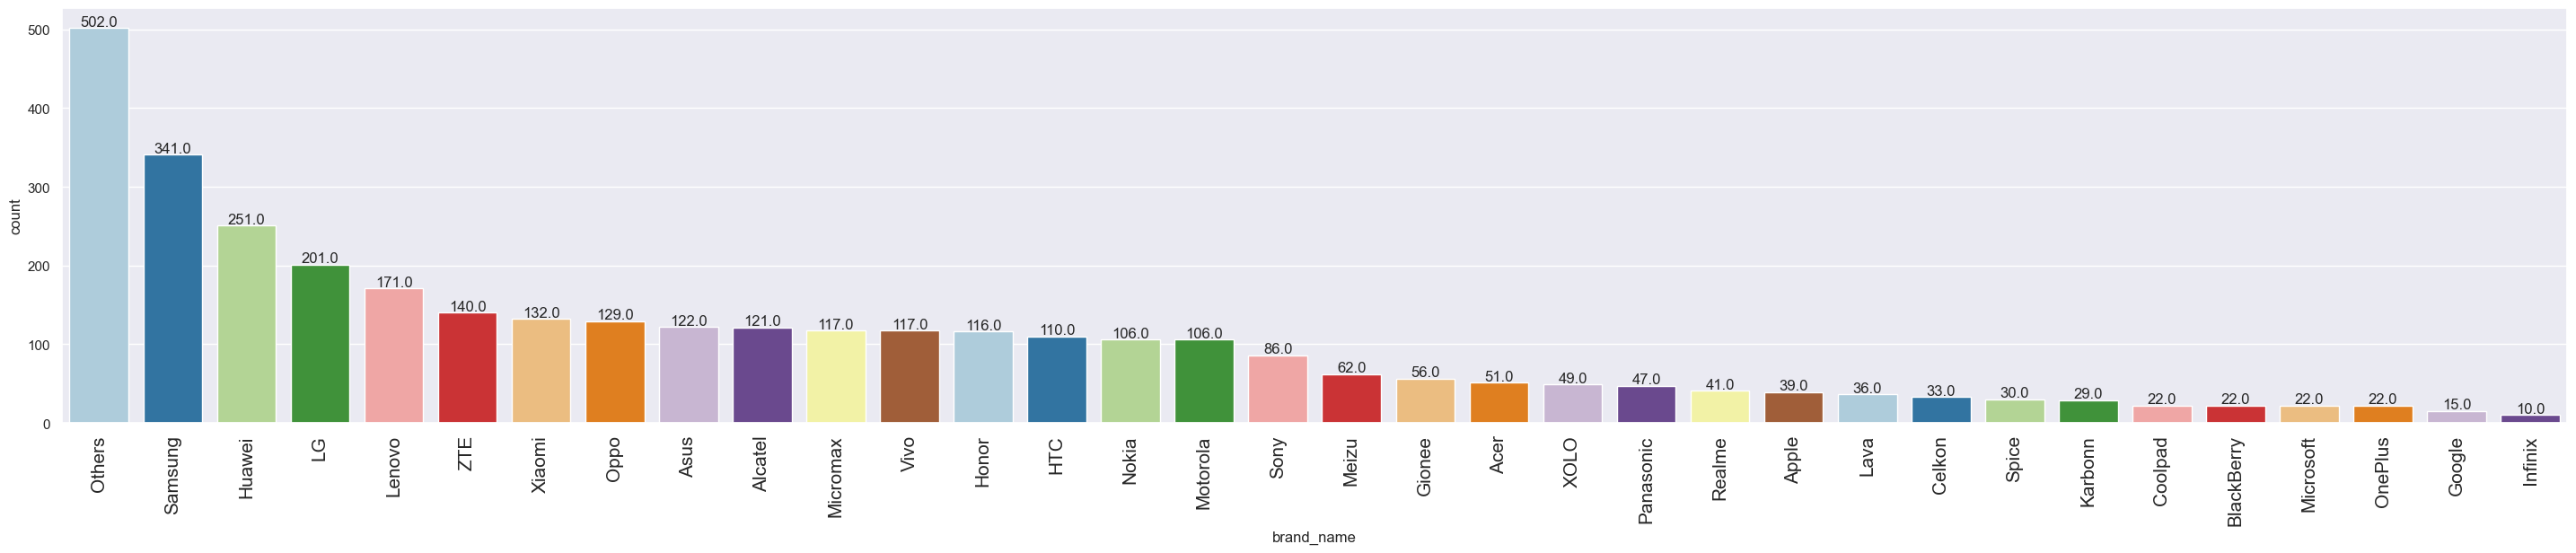

In [115]:
labeled_barplot(df,"brand_name")

In [116]:
df["brand_name"].nunique()

34

***Observation***
- There are 34 different brands in the brand_names
- Top brandnames others have the 502 and followed by the samsung 341
- the bootom places hold by infinix and followed by google 


***os***
2. What percentage of the used device market is dominated by Android devices?

In [117]:
df["os"].nunique()

4

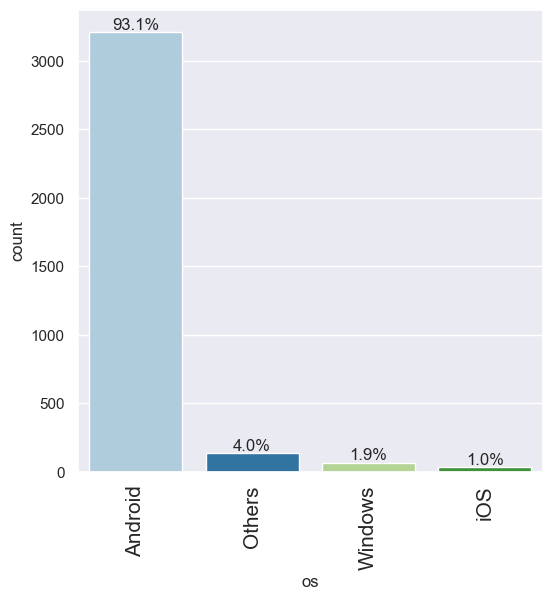

In [118]:
labeled_barplot(df,"os",perc=True)

***Observation***
- Most of the brands are using Android with 3214 
- least use the IOS 36.0
- Second least is Windows phones 
- 93.1% of used device market is dominated by Android devices.


***4g***

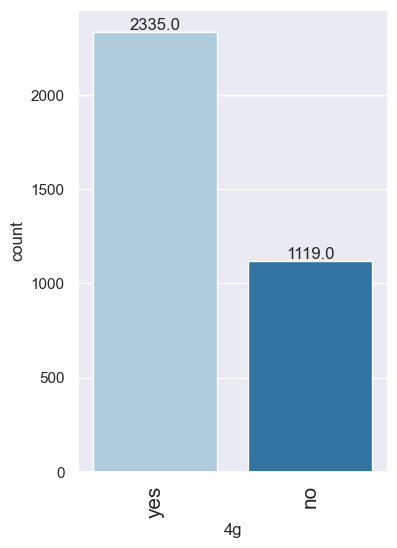

In [119]:
labeled_barplot(df,"4g")

***Observation***
- 2335 are 4g phones which is the major share of the data.


***5g***

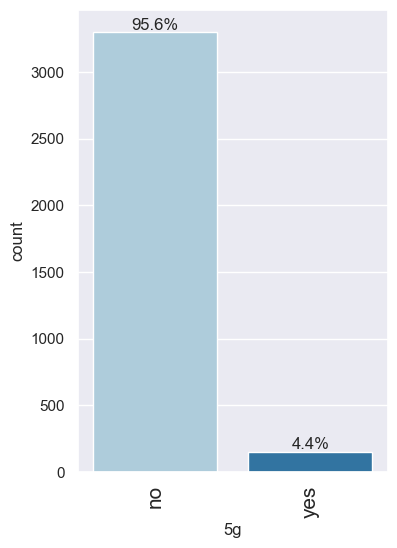

In [120]:
labeled_barplot(df,"5g",perc=True)

In [121]:
not_5g_4g=df[df["4g"]=="yes"].shape[0]- df[df["5g"]=="yes"].shape[0]
not_5g_4g

2183

***Observation***
- 2183 is not a 4g or 5g phones 
- 152 are only 5g phones 

***release_year***

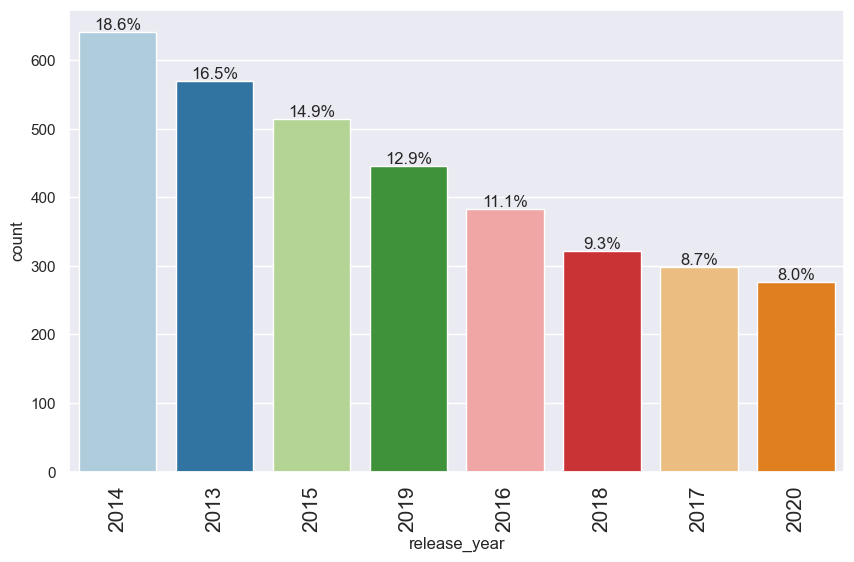

In [122]:
labeled_barplot(df,"release_year",perc=True)

***Observation***
- 2014 has the 18.6% of remaining years 
- 2020 has the least percentage of the release_year 

## Bivariate Analysis
***first we are checking the heatmap to check the correlation between*** 

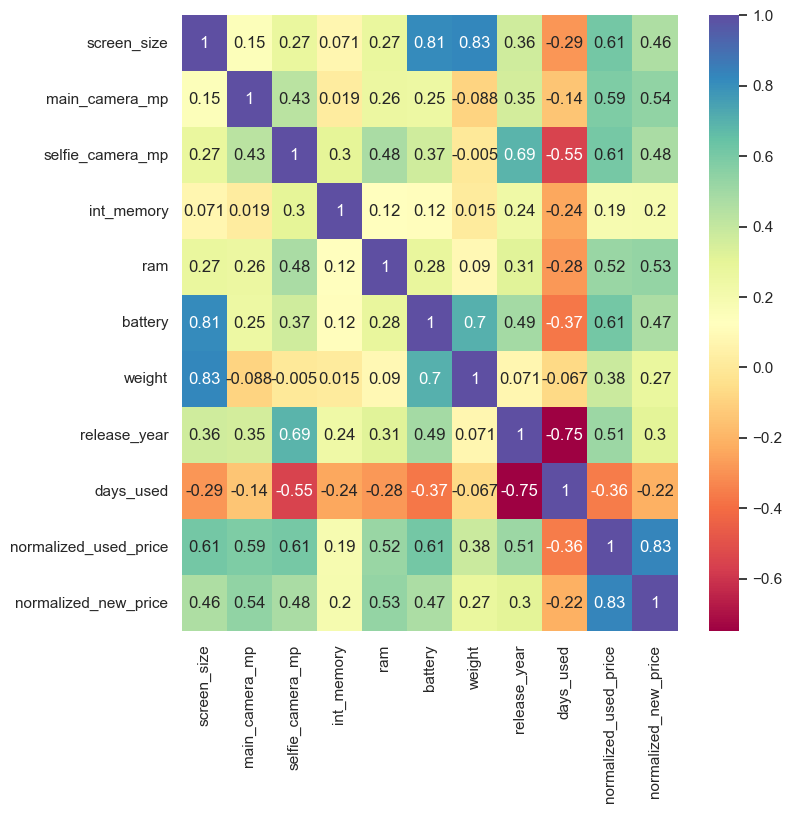

In [123]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Spectral");
plt.show()


***Observation***
- `screen_size` has strong relation with `battery`and `weight` which around 0.82
- `normalized_used_phones` has strong relation with `normalized_new_price` which is around 0.83
- `release_year` is in float which should be date we can ignore that currently
- `screen_size` has a significate positive relation with `normalized_used_price`
- `normalized_used_phones` has a significate positive relation b/w `main_camera_mp`,`ram`,`battery`,and `selfie_camera_mp`

### Bi-Variate analysis
***The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?***

In [124]:
def box_bar_plot (data,feature_1,feature_2,figsize=(15,5)):
    f,(ax_1,ax_2)=plt.subplots(
        nrows=2,
        figsize=figsize,
        gridspec_kw={'height_ratios': (0.15,.20)}
    )
    f.tight_layout() 
    sns.boxplot(data,x=feature_1,y=feature_2,showmeans=True,ax=ax_1)
    ax_1.tick_params(labelrotation=45)
    sns.barplot(data,x=feature_1,y=feature_2,palette="Set2")
    ax_2.tick_params(labelrotation=45)
    plt.show()

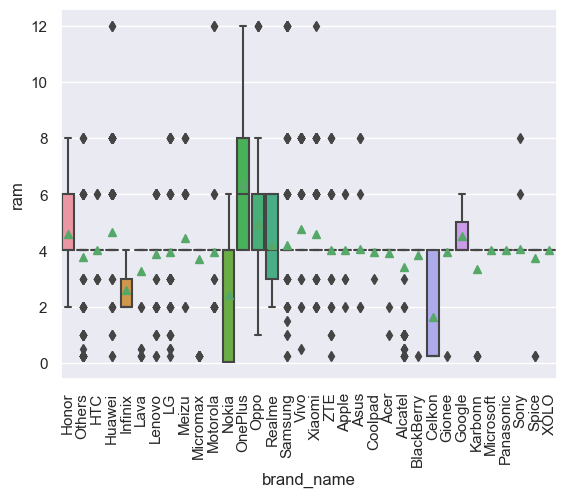

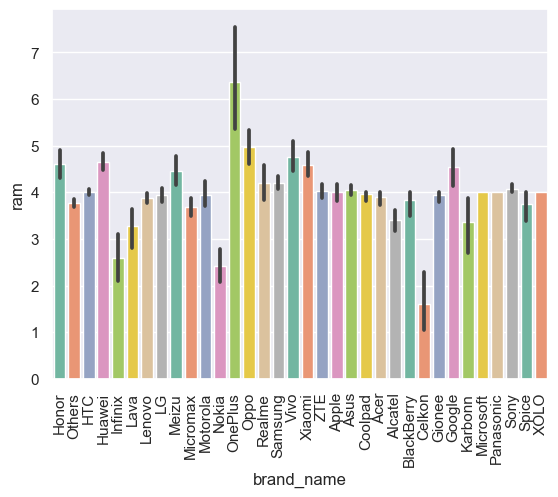

In [125]:
sns.boxplot(data,x="brand_name",y="ram",showmeans=True);
plt.xticks(rotation=90);
plt.show()
sns.barplot(data,x="brand_name",y="ram",palette="Set2");
plt.xticks(rotation=90);
plt.show()

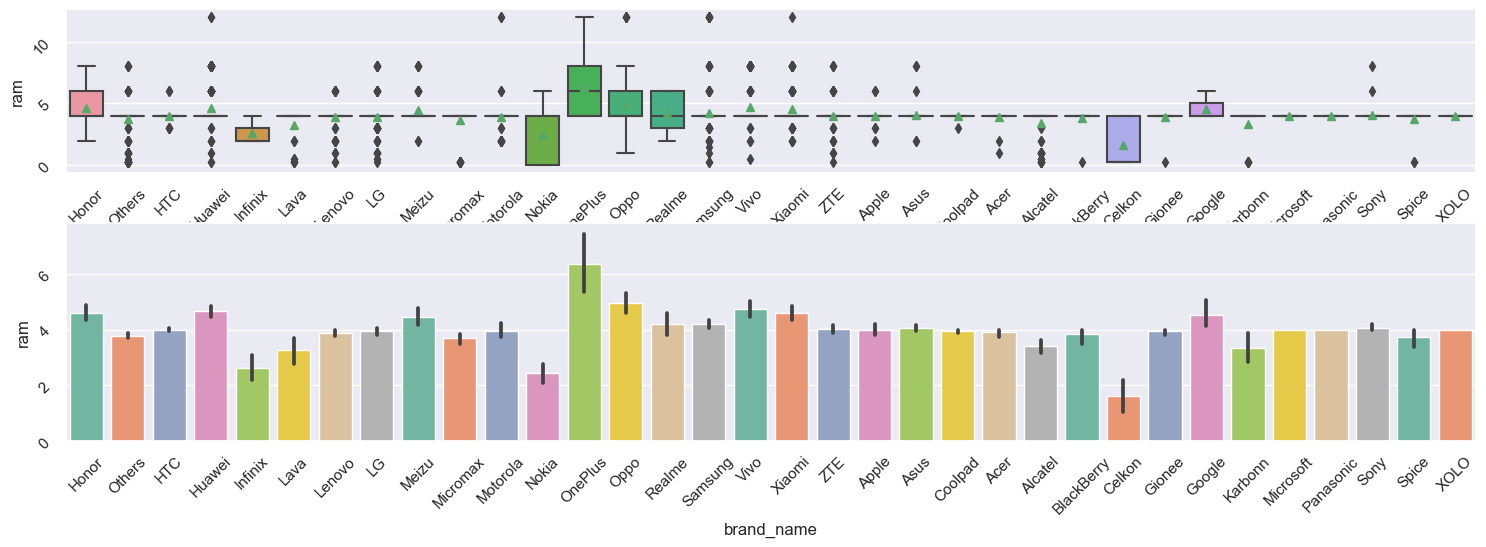

In [126]:
box_bar_plot(data,"brand_name","ram")

***Observation***
- The oneplues has better ram compared to other brands
- There are many outliers on both ends of whiskers in the other brands compared to oneplus 
- none of the brands are normally distrubuted 

***A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?***

In [127]:
df_large_battery=df[df["battery"]>4500]
df_large_battery.shape

(341, 15)

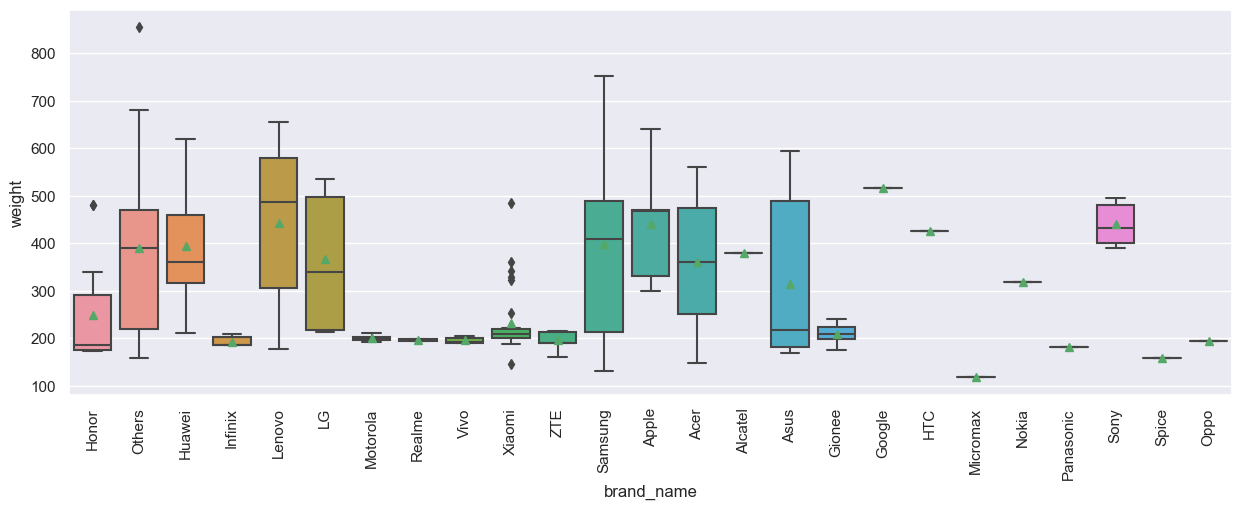

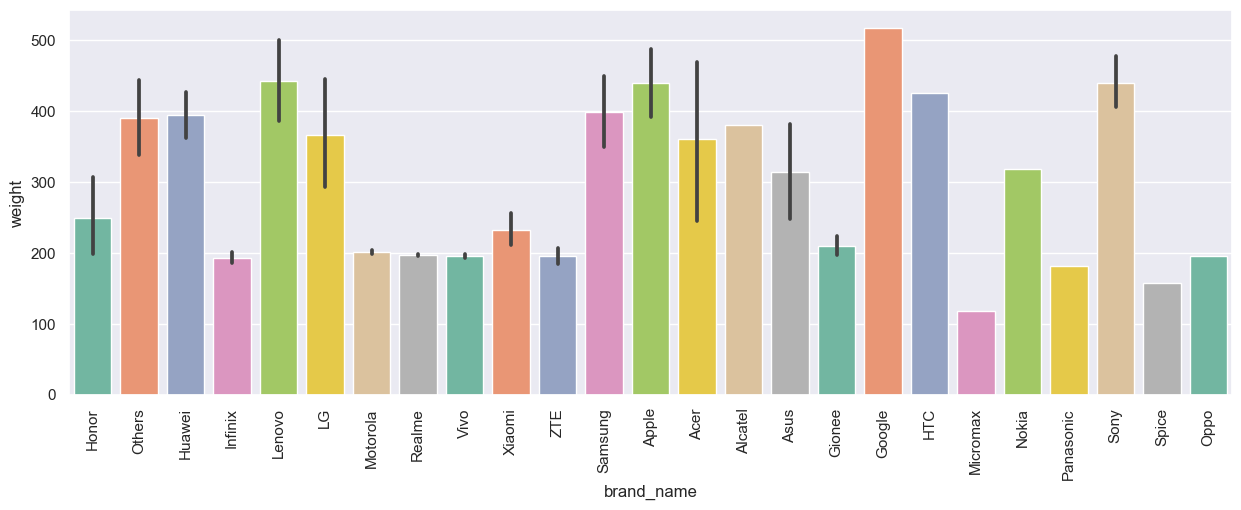

In [128]:
plt.figure(figsize=(15,5))
sns.boxplot(df_large_battery,x="brand_name",y="weight",showmeans=True);
plt.xticks(rotation=90);
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(df_large_battery,x="brand_name",y="weight",palette="Set2");
plt.xticks(rotation=90);
plt.show()

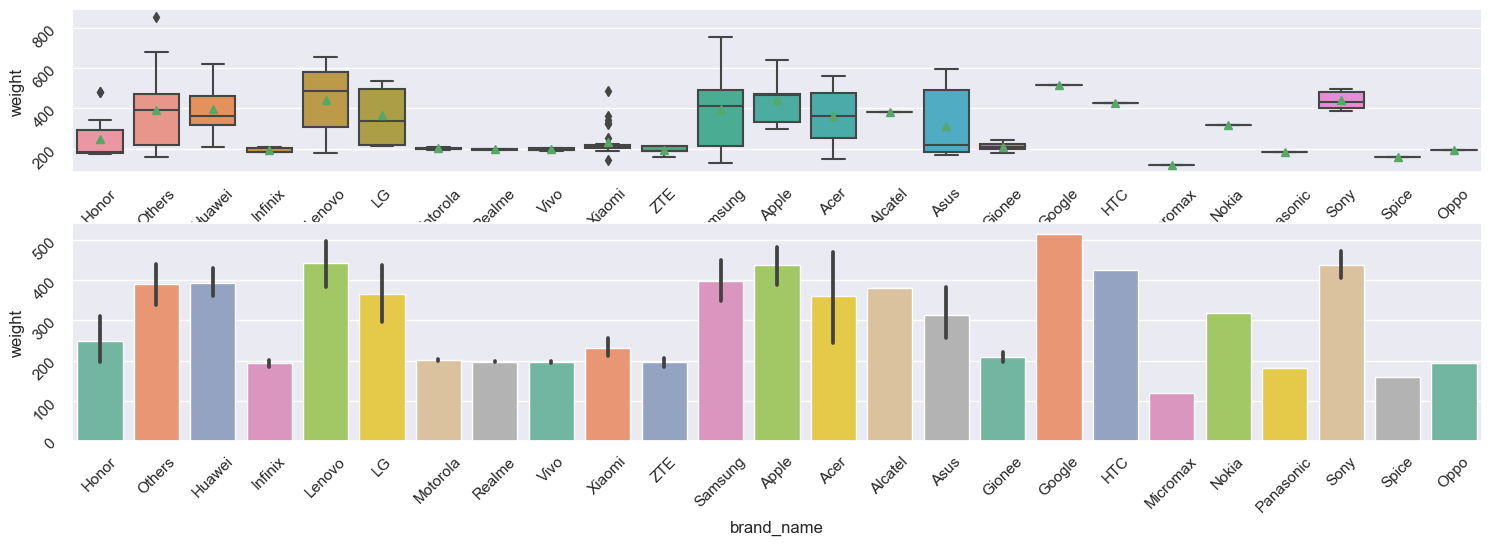

In [129]:
box_bar_plot(df_large_battery,"brand_name","weight")

***Observation***
- The distribution of the weight of the devices associated with the brand seems to noticeable different from one another.
- None of the distributions appear the be normally distributed and some brand distributions for the weight have outliers.
- The brand that has the heaviest devices is Google and the brand that has the lightest devices is Micromax

***Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?***

In [130]:
big_screen=df[df["screen_size"]>6*2.54]
big_screen.shape

(1099, 15)

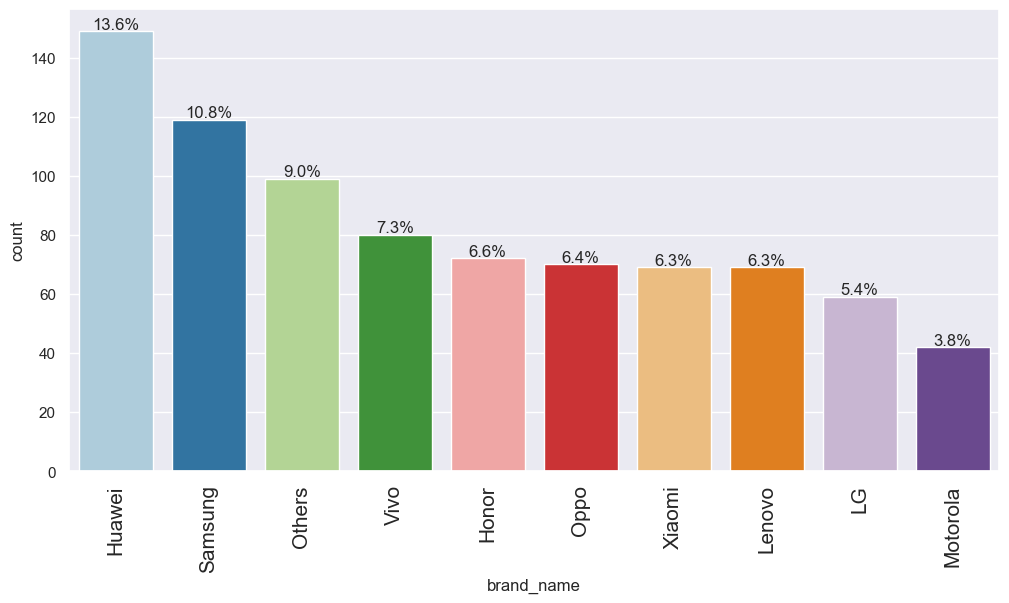

In [131]:
labeled_barplot(big_screen, 'brand_name', perc=True, n=10) 

***Observation***
- The brand that has the most amount of devices with screen sizes larger than 6 inches is Huawei, taking up 13.6% of the market. This is followed by Samsung and other miscellaneous brands with market shares of 10.8% and 9%, respectively.


***A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?***

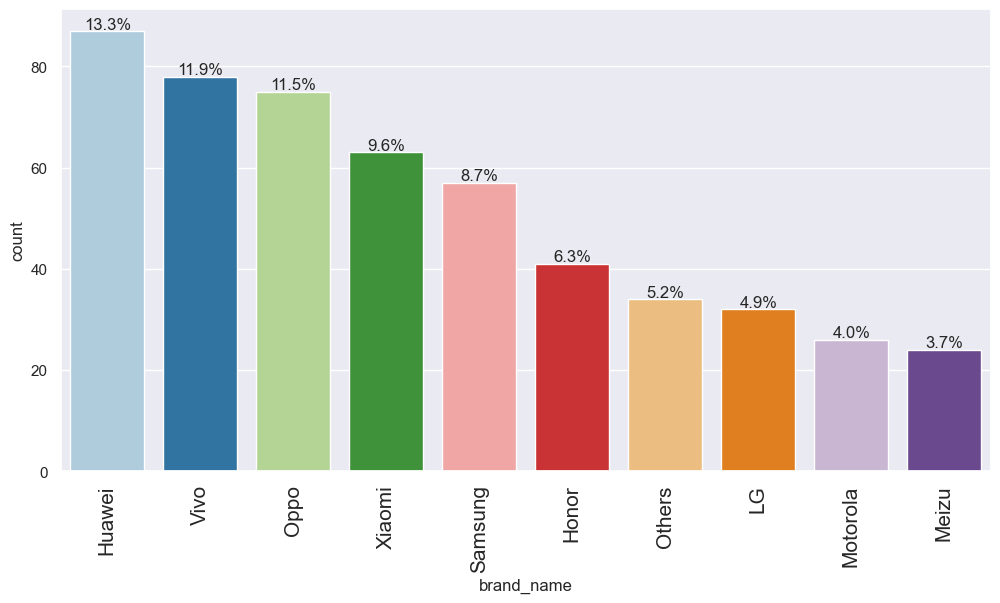

In [132]:
selfie_camera_mp=df[df["selfie_camera_mp"]>8]
labeled_barplot(selfie_camera_mp, 'brand_name', perc=True, n=10) 

***Observation***
- The brand that has the most amount of devices with selfie cameras that have more than 8 MP is Huawei, taking up 13.3% of the market. This is followed by Vivo and Oppo with market shares of 11.9% and 11.5%, respectively.


***Which attributes are highly correlated with the normalized price of a used device?***
- For the heatmap normalized_used_price has correlated with normalized_new_price first we are checking the relation 

/Users/saisampath/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


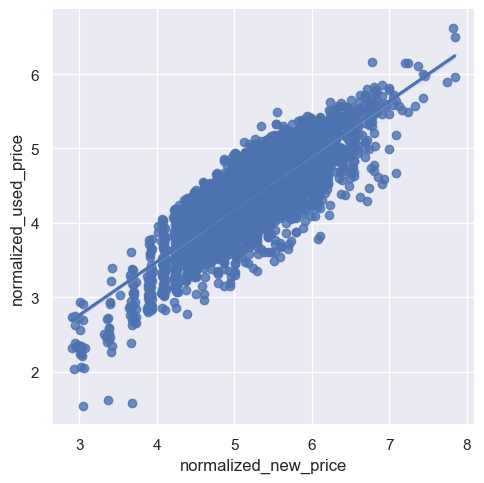

In [133]:
sns.lmplot(df,y="normalized_used_price",x="normalized_new_price");

***Observation***
- we are observing a positive relation between the normalized_used_price vs normalized_new_price 

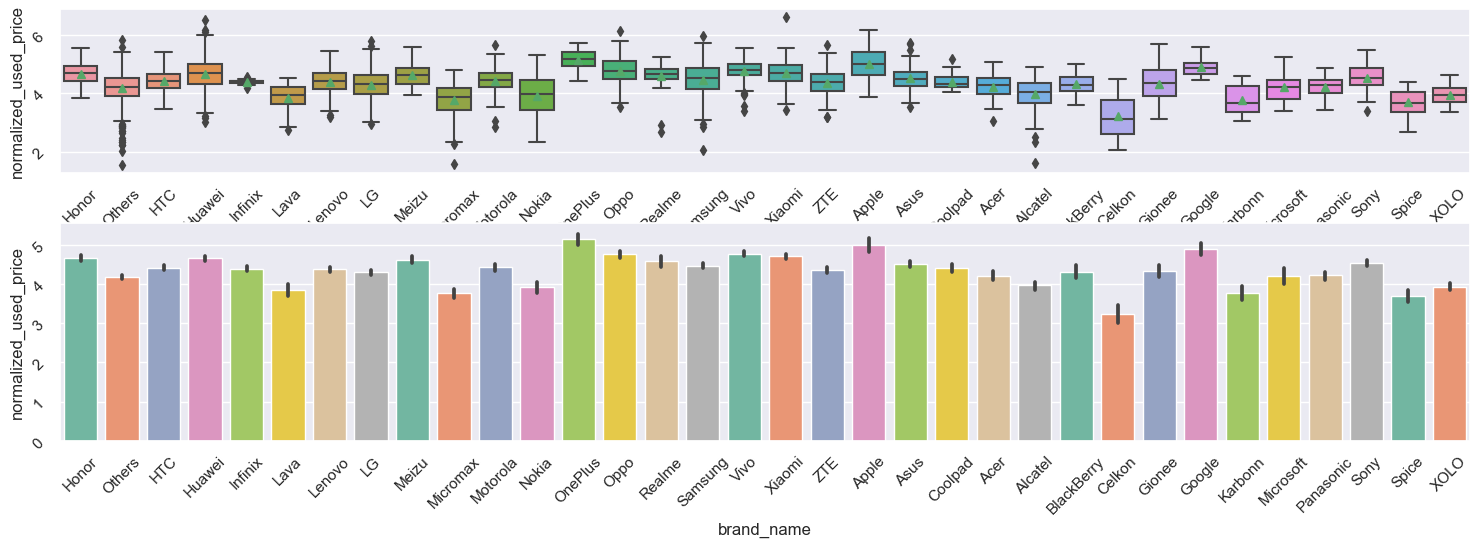

In [134]:
box_bar_plot(df,"brand_name","normalized_used_price")

***Observation***
- We are not having any significant relationship, but the max normalized_used_price brand is Oneplus and followed by Apple and google 


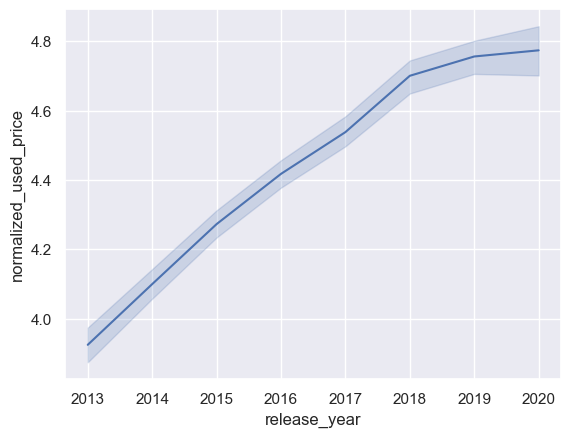

In [135]:
sns.lineplot(df,x="release_year",y="normalized_used_price");

***Observation***
- we are seeing a positive trend b/w normalized_used_price and release_year which is increasing significantly. 

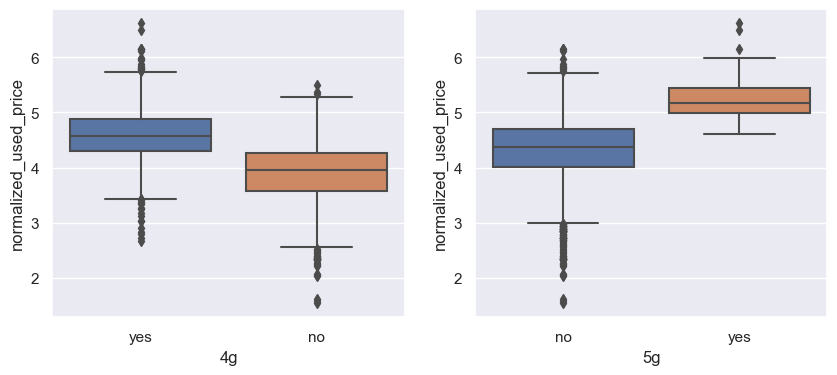

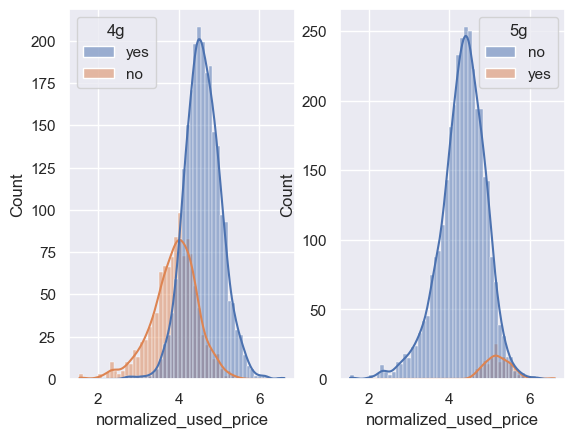

In [136]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.boxplot(df,y="normalized_used_price",x="4g")

plt.subplot(122)
sns.boxplot(df,y="normalized_used_price",x="5g")
plt.show()
plt.subplot(121)
sns.histplot(df,x="normalized_used_price",hue="4g",kde=True)
plt.subplot(122)
sns.histplot(df,x="normalized_used_price",hue="5g",kde=True)
plt.show()

***Observation***
- It appears that devices with 4g availbilty have a higher normalized price than devices that don't.
- It appears that devices with 5g availbilty have a higher normalized price than devices that don't.
- Devices that possess 5g have a higher normalized price than devices that possess 4g.
- Normalized price the have 4g are normally distrubuted 

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

***Missing value treatment***
- First we are checking the null values and from the above we will fill nan with mean or the median value 


In [137]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [138]:
# we are making the col which collect all the null values in col 
col=["main_camera_mp","selfie_camera_mp","int_memory","ram","battery","weight"]
df[col]=df[col].fillna(value=
                      df.groupby(df["brand_name"])[col].transform("median"))


In [139]:
#still we are seeing main_camera_mp null values we can take the median or we can take the mean value 
df["main_camera_mp"]=df["main_camera_mp"].fillna(value=df["main_camera_mp"].median())
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

***Observation***
- After verifying for null values, we took the brand name as the a categorical group and substituted the following null values with their means. 
- Following that, we discovered that main_camera_mp had additional null values, so we replaced those with their means as well. 
- We have accomplished our success

***Feature engineering (if needed)***
- we need to check the years columns
- we have `information` The data was collected in the year 2021. 

In [140]:
df["years_used"]=2021-df["release_year"]
df=df.drop(["release_year"],axis=1)
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_used
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


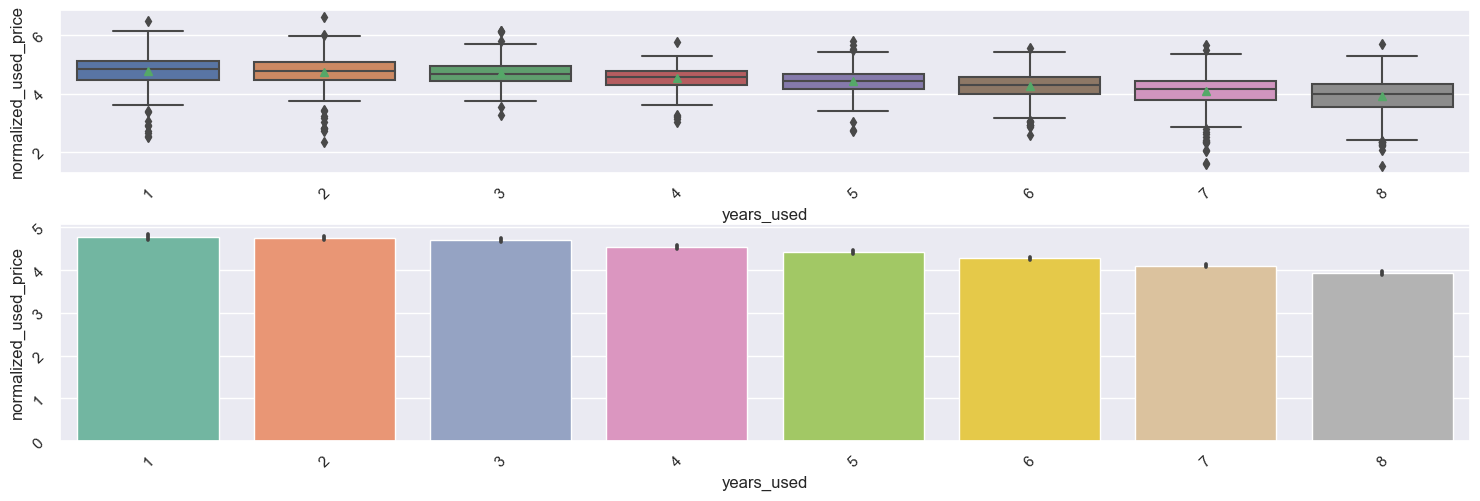

In [141]:
# just check the relation with years_used vs  normalized_used_price\
box_bar_plot(df,"years_used","normalized_used_price")

***Observation*** 
- As the years go by, there is a noticeable amount of price depresaction. 

***Outlier detection and treatment (if needed)***
- Prior to deciding what to do with the outliers, we will plot the outliers in every category.

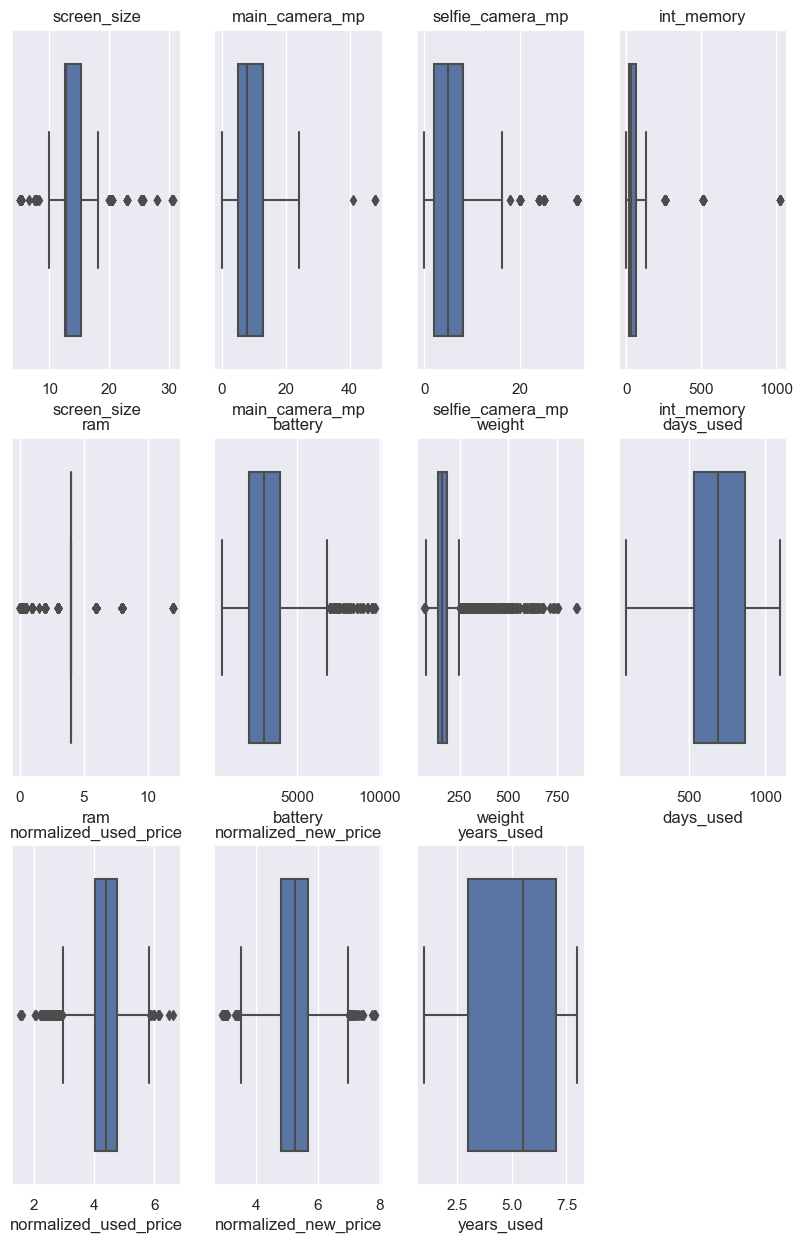

In [142]:
# for the ploting we need the for condition to plot all the numerical values 
numerical_df=df.select_dtypes(include="number")
plt.figure(figsize=(10,15))
for i , variable in enumerate(numerical_df):
    plt.subplot(3,4,i+1)
    sns.boxplot(numerical_df,x=variable)
    plt.title(variable)
    
plt.show()

#### ***Observation***
- We are unable to eliminate any outliers from the data based on the graph and details provided. treating may trigger the data to be lost   

In [143]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_used
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


In [144]:
def outliers_fix(df,feature):
    q1=df[feature].quantile(0.25)
    q3=df[feature].quantile(.75)
    IQR=q3-q1
    lower_whisker=df[feature] -.025*IQR
    higher_whisker=df[feature]+0.25*IQR
    df=np.clip(df[feature],lower_whisker,higher_whisker)
    return df

In [145]:
outliers_fix(df,"battery")

0       3020.0
1       4300.0
2       4200.0
3       7250.0
4       5000.0
         ...  
3449    5000.0
3450    4000.0
3451    4000.0
3452    4000.0
3453    4000.0
Name: battery, Length: 3454, dtype: float64

In [146]:
outliers_fix(df,"ram")

0       3.0
1       8.0
2       8.0
3       6.0
4       3.0
       ... 
3449    6.0
3450    8.0
3451    3.0
3452    2.0
3453    2.0
Name: ram, Length: 3454, dtype: float64

In [147]:
outliers_fix(df,"weight")

0       146.0
1       213.0
2       213.0
3       480.0
4       185.0
        ...  
3449    190.0
3450    200.0
3451    165.0
3452    160.0
3453    168.0
Name: weight, Length: 3454, dtype: float64

## EDA

- It is a good idea to explore the data once again after manipulating it.

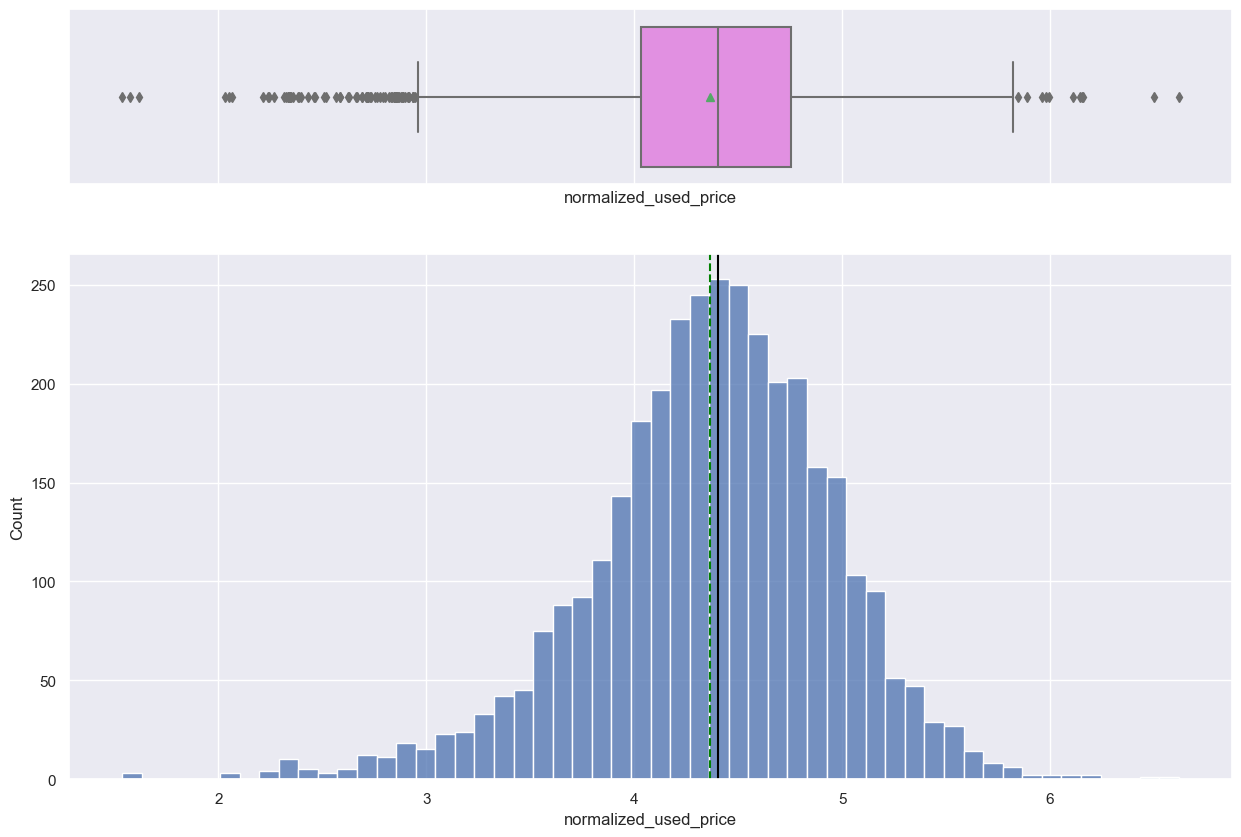

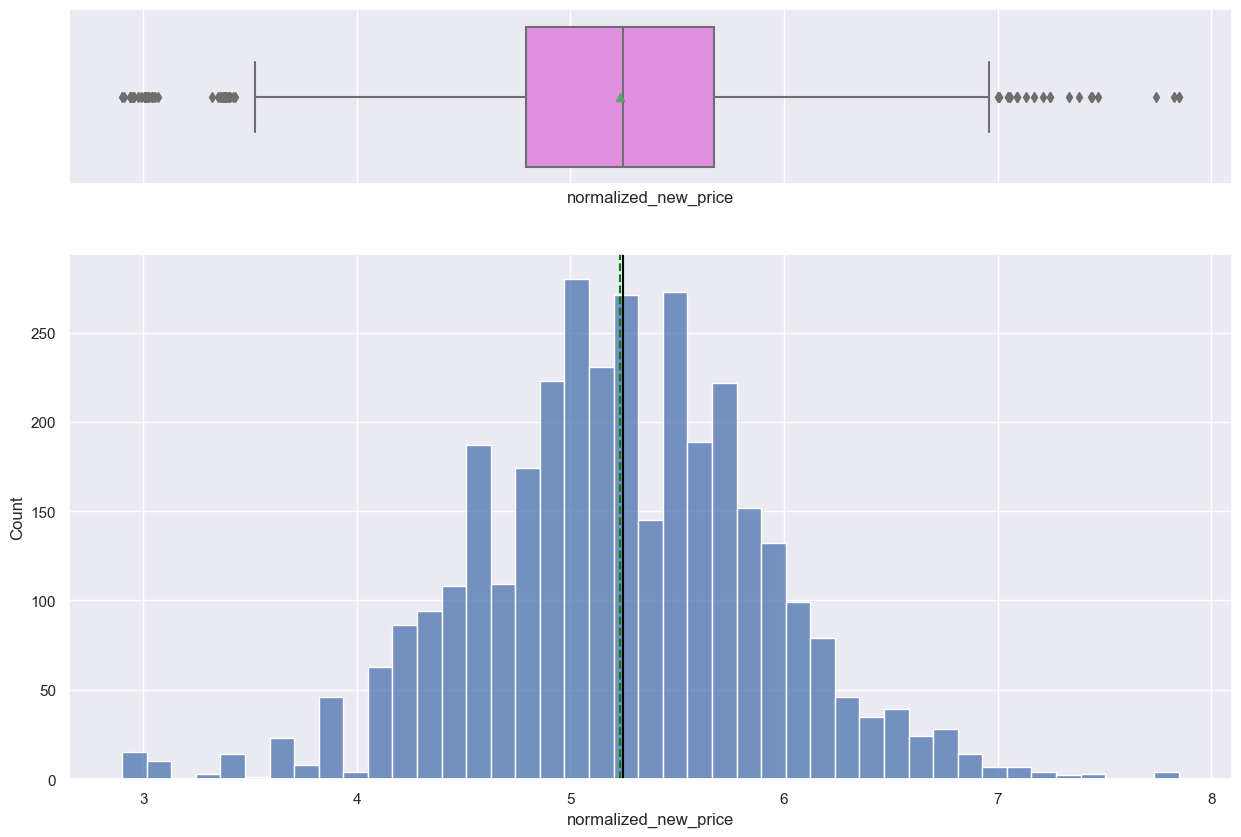

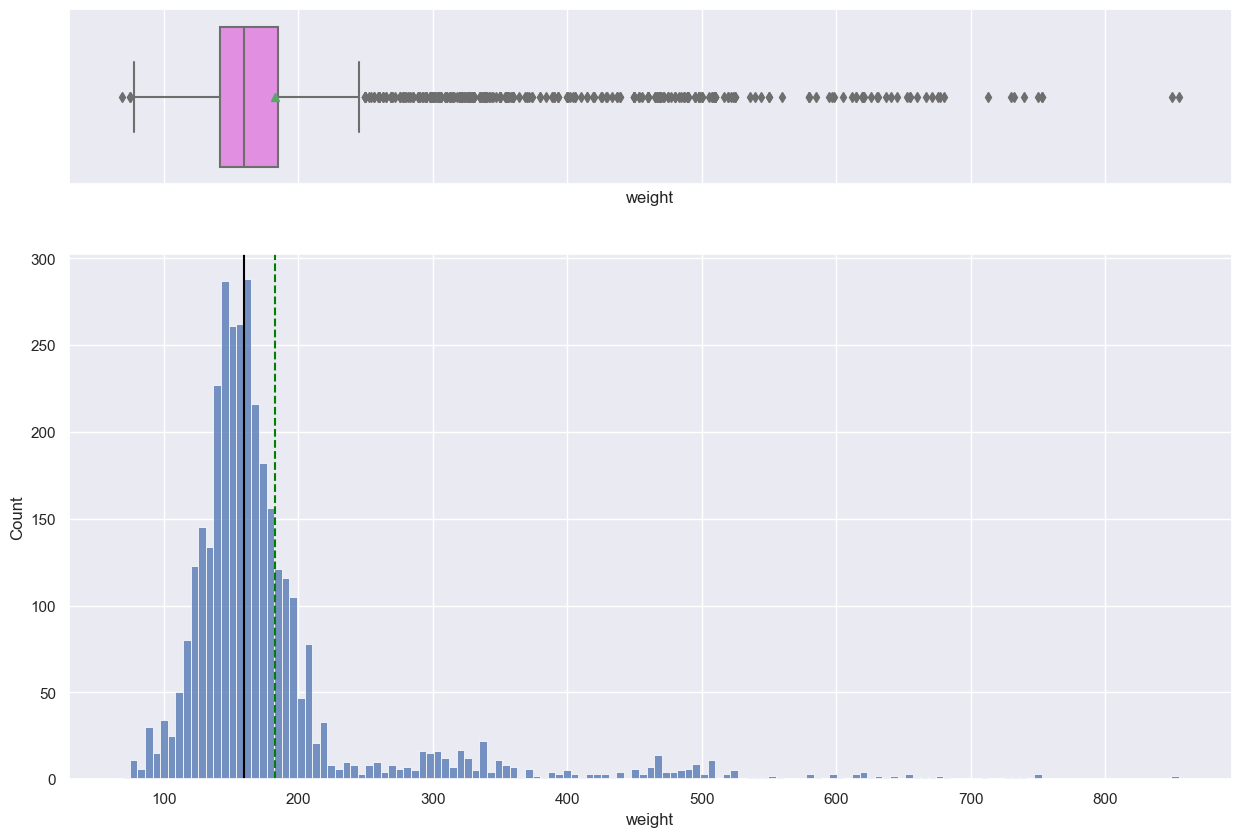

In [148]:
for col in ["normalized_used_price", "normalized_new_price", "weight"]:
    hist_boxplot(df, col)

***Observation*** 
- When comparing the present plotting to the prior plotting, not much has changed.
- The weight has outliers since the weight of the tab differs from the weight of the phone.
- The mean and median are all the same from the previous plotting to the present plotting. 

## Model Building - Linear Regression

***Requirement***
#### Create a linear regression model to forecast the cost of a used phone or tablet and pinpoint the variables that have a big impact on it.
- Thus, we are using the normalized_used_price as the y-axis, and we will forecast the values using other variables that affect the prediction.
- To assess the model we built using the train data, we are dividing the data into train and test sets. We next do linear regression analysis on the train set to determine the performance.

In [149]:
X= df.drop("normalized_used_price",axis=1)
Y = df["normalized_used_price"]
X.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_used
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


In [150]:
X=pd.get_dummies(X,X.select_dtypes(include=["object","category"]).columns.to_list(),drop_first=True,dtype=float)
X.head().T

,0,1,2,3,4
screen_size,14.5000,17.300000,16.690000,25.500000,15.320000
main_camera_mp,13.0000,13.000000,13.000000,13.000000,13.000000
selfie_camera_mp,5.0000,16.000000,8.000000,8.000000,8.000000
int_memory,64.0000,128.000000,128.000000,64.000000,64.000000
ram,3.0000,8.000000,8.000000,6.000000,3.000000
battery,3020.0000,4300.000000,4200.000000,7250.000000,5000.000000
weight,146.0000,213.000000,213.000000,480.000000,185.000000
days_used,127.0000,325.000000,162.000000,345.000000,293.000000
normalized_new_price,4.7151,5.519018,5.884631,5.630961,4.947837
years_used,1.0000,1.000000,1.000000,1.000000,1.000000


In [151]:
X=sm.add_constant(X)

In [152]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=.20,random_state=10)

In [153]:
olsmodel=sm.OLS(y_train,x_train).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.861
Model:                               OLS   Adj. R-squared:                  0.850
Method:                    Least Squares   F-statistic:                     82.56
Date:                   Thu, 21 Mar 2024   Prob (F-statistic):          4.63e-241
Time:                           09:32:36   Log-Likelihood:                 61.786
No. Observations:                    690   AIC:                            -25.57
Df Residuals:                        641   BIC:                             196.7
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.3185      0.131     10.028      0.000       1.060       1.577
screen_size               0.0336      0.007      4.932      0.000       0.020       0.047
main_camera_mp            0.0233      0.003      7.750      0.000       0.017       0.029
selfie_camera_mp          0.0136      0.002      6.249      0.000       0.009       0.018
int_memory             8.355e-06      0.000      0.071      0.943      -0.000       0.000
ram                       0.0376      0.010      3.944      0.000       0.019       0.056
battery               -2.633e-05   1.42e-05     -1.852      0.064   -5.43e-05    1.58e-06
weight                    0.0007      0.000      2.863      0.004       0.000       0.001
days_used              7.919e-05   5.82e-05      1.361      0.174   -3.51e-05       0.000
normalized_new_price      0.4175      0.024     17.453      0.000       0.371       0.464
years_used               -0.0318      0.009     -3.699      0.000      -0.049      -0.015
brand_name_Alcatel        0.0212      0.085      0.250      0.803      -0.145       0.187
brand_name_Apple         -0.0046      0.173     -0.027      0.979      -0.344       0.334
brand_name_Asus          -0.0198      0.092     -0.215      0.830      -0.201       0.161
brand_name_BlackBerry    -0.0057      0.156     -0.037      0.971      -0.312       0.301
brand_name_Celkon        -0.0815      0.136     -0.598      0.550      -0.349       0.186
brand_name_Coolpad        0.0072      0.127      0.056      0.955      -0.242       0.256
brand_name_Gionee        -0.0746      0.105     -0.713      0.476      -0.280       0.131
brand_name_Google        -0.2623      0.179     -1.463      0.144      -0.614       0.090
brand_name_HTC           -0.0721      0.087     -0.826      0.409      -0.244       0.099
brand_name_Honor          0.0054      0.085      0.063      0.949      -0.161       0.172
brand_name_Huawei        -0.0287      0.077     -0.371      0.711      -0.181       0.123
brand_name_Infinix        0.1284      0.140      0.917      0.359      -0.147       0.403
brand_name_Karbonn        0.1603      0.125      1.279      0.201      -0.086       0.406
brand_name_LG             0.0175      0.081      0.217      0.828      -0.141       0.176
brand_name_Lava          -0.0444      0.108     -0.413      0.680      -0.256       0.167
brand_name_Lenovo        -0.0042      0.080     -0.053      0.958      -0.161       0.152
brand_name_Meizu         -0.0150      0.106     -0.142      0.887      -0.223       0.193
brand_name_Micromax      -0.0336      0.088     -0.383      0.702      -0.206       0.139
brand_name_Microsoft      0.1779      0.149      1.195      0.233      -0.114       0.470
brand_name_Motorola      -0.0376      0.088     -0.428      0.669      -0.210   

***Primary Model Observation***

- The adjusted R2 value shows the accuracy of model fit. The better fit is indicated by a higher adjusted r2 value, which ranges from 0 to 1. presuming a few things are true.
- We have an adjusted r2 of 0.858, which is a good value. 
- The predicted result will equal the const coefficent if all const values are zero, which is the case in this instance where the const coeff is 1.5981

## Model Performance Check

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_checking (predictors):
    vif=pd.DataFrame()
    vif["index"]=predictors.columns
    vif["VIF_VALUES"]=[variance_inflation_factor(predictors,i) for i in range (predictors.shape[1]) ]
    return vif

In [155]:
from sklearn.metrics import r2_score
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [156]:
model_performance_regression(olsmodel,x_train,y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.221245,0.172569,0.860765,0.850105,4.186823


In [157]:
model_performance_regression(olsmodel,x_test,y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241626,0.188093,0.83101,0.827959,4.478865


***Observation***
#### checking the performance of the model 
- The model's performance is indicated by the following: 
- The r2 and adjusted r2 values are close, indicating that the model is performing well;
- The rmse and mae values are comparable, indicating that the model performs well; 
- The mean error of the model is 0.24 when comparing the train and test data, indicating that the results are good and accurate. 

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

***We will be checking the following Linear Regression assumptions:***

- No Multicollinearity

- Linearity of variables

- Independence of error terms

- Normality of error terms

- No Heteroscedasticity

***No Multicollinearity***
- To check the No Multicollinearity we have function name `vif_checking`
- If the results show that the effect ranges from 0 to 1 low, 1 to 5 medium, and 5 to 10 high. 

In [158]:
vif_checking(x_train)

,index,VIF_VALUES
0,const,226.359866
1,screen_size,10.050101
2,main_camera_mp,2.649644
3,selfie_camera_mp,2.940030
4,int_memory,1.353313
5,ram,2.198602
6,battery,5.303048
7,weight,7.148494
8,days_used,2.665671
9,normalized_new_price,3.423364


***Observation*** 
- We can drop and evaluate the model performance based on the multicollinearity of years_used, weight, and screen_size in the above chat. 
- We can choose what not to include while creating the function that will provide the model with performance.

In [159]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [160]:
multicol=["years_used", "battery","screen_size","weight"]
treating_multicollinearity(x_train,y_train,multicol)

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,battery,0.849772,0.229980
1,weight,0.848662,0.230828
2,years_used,0.847382,0.231802
3,screen_size,0.844903,0.233678


In [161]:
x_train_1= x_train.drop(["battery","weight"],axis=1)
x_test_1= x_test.drop(["battery","weight"],axis=1)
oslmodel_1=sm.OLS(y_train,x_train_1).fit()
oslmodel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.859
Model:                               OLS   Adj. R-squared:                  0.849
Method:                    Least Squares   F-statistic:                     84.96
Date:                   Thu, 21 Mar 2024   Prob (F-statistic):          5.48e-241
Time:                           09:32:37   Log-Likelihood:                 56.762
No. Observations:                    690   AIC:                            -19.52
Df Residuals:                        643   BIC:                             193.7
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.2469      0.127      9.841      0.000       0.998       1.496
screen_size               0.0425      0.003     13.908      0.000       0.036       0.048
main_camera_mp            0.0215      0.003      7.249      0.000       0.016       0.027
selfie_camera_mp          0.0131      0.002      6.031      0.000       0.009       0.017
int_memory            -7.691e-06      0.000     -0.065      0.948      -0.000       0.000
ram                       0.0367      0.010      3.831      0.000       0.018       0.055
days_used               9.89e-05   5.81e-05      1.702      0.089   -1.52e-05       0.000
normalized_new_price      0.4193      0.024     17.437      0.000       0.372       0.467
years_used               -0.0279      0.009     -3.268      0.001      -0.045      -0.011
brand_name_Alcatel        0.0041      0.085      0.048      0.962      -0.163       0.171
brand_name_Apple         -0.0273      0.173     -0.157      0.875      -0.368       0.313
brand_name_Asus          -0.0309      0.092     -0.335      0.738      -0.212       0.150
brand_name_BlackBerry    -0.0171      0.157     -0.109      0.913      -0.325       0.291
brand_name_Celkon        -0.0803      0.137     -0.585      0.559      -0.350       0.189
brand_name_Coolpad       -0.0095      0.127     -0.075      0.940      -0.260       0.240
brand_name_Gionee        -0.0771      0.105     -0.735      0.463      -0.283       0.129
brand_name_Google        -0.2753      0.180     -1.527      0.127      -0.629       0.079
brand_name_HTC           -0.0780      0.088     -0.889      0.374      -0.250       0.094
brand_name_Honor         -0.0108      0.085     -0.127      0.899      -0.178       0.156
brand_name_Huawei        -0.0386      0.078     -0.497      0.619      -0.191       0.114
brand_name_Infinix        0.0832      0.139      0.597      0.550      -0.190       0.357
brand_name_Karbonn        0.1376      0.126      1.094      0.274      -0.109       0.385
brand_name_LG             0.0053      0.081      0.065      0.948      -0.154       0.164
brand_name_Lava          -0.0622      0.108     -0.577      0.564      -0.274       0.150
brand_name_Lenovo        -0.0148      0.080     -0.186      0.853      -0.171       0.142
brand_name_Meizu         -0.0289      0.106     -0.272      0.786      -0.238       0.180
brand_name_Micromax      -0.0492      0.088     -0.560      0.576      -0.222       0.123
brand_name_Microsoft      0.1647      0.150      1.101      0.271      -0.129       0.458
brand_name_Motorola      -0.0464      0.088     -0.527      0.599      -0.219       0.127
brand_name_Nokia          0.0865      0.089      0.975      0.330      -0.088       0.261
brand_name_OnePlus        0.0687      0.137      0.500      0.617      -0.201   

In [162]:
vif_checking(x_train_1)

,index,VIF_VALUES
0,const,207.810240
1,screen_size,1.995634
2,main_camera_mp,2.546703
3,selfie_camera_mp,2.907790
4,int_memory,1.343806
5,ram,2.189148
6,days_used,2.628786
7,normalized_new_price,3.421145
8,years_used,4.853838
9,brand_name_Alcatel,3.262872


***Observation***
- `screen_size`,`weight` we droped from the x_train and x_test. The following are the results.
- R-squared:	0.865
- Adj. R-squared:	0.856
- `screen_size`,`brand_name_Apple`,`os_iOS`  Since the values had a high degree of multicollinearity and are larger than 5, we checked each individual's score; it had no bearing, thus we removed them.

***Check the p-values***
- 4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.


- 5. **P>|t|**: It is p-value.
   
    * For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

        - $H_o$ : Independent feature is not significant ($\beta_i = 0$)
        - $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

    * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
        
        - A p-value of less than 0.05 is considered to be statistically significant.


- 6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

**Observations**

- We can see that adj. R-squared has dropped from 0.866 to 0.865, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dealing with high p-value variables
- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [163]:
# initial list of columns
predictors = x_train_1.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'years_used', 'brand_name_Vivo', '5g_yes']


In [164]:
x_train3 = x_train_1[selected_features]
x_test3 = x_test_1[selected_features]

In [165]:
olsmodel_3=sm.OLS(y_train,x_train3).fit()
olsmodel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.853
Model:                               OLS   Adj. R-squared:                  0.851
Method:                    Least Squares   F-statistic:                     439.7
Date:                   Thu, 21 Mar 2024   Prob (F-statistic):          1.25e-276
Time:                           09:32:37   Log-Likelihood:                 43.895
No. Observations:                    690   AIC:                            -67.79
Df Residuals:                        680   BIC:                            -22.42
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2502      0.083     15.010      0.000       1.087       1.414
screen_size              0.0426      0.003     15.673      0.000       0.037       0.048
main_camera_mp           0.0209      0.002      8.644      0.000       0.016       0.026
selfie_camera_mp         0.0132      0.002      6.722      0.000       0.009       0.017
ram                      0.0317      0.009      3.639      0.000       0.015       0.049
days_used                0.0001   5.46e-05      1.982      0.048    1.04e-06       0.000
normalized_new_price     0.4217      0.020     21.142      0.000       0.383       0.461
years_used              -0.0324      0.007     -4.593      0.000      -0.046      -0.019
brand_name_Vivo         -0.1072      0.049     -2.193      0.029      -0.203      -0.011
5g_yes                  -0.1698      0.060     -2.849      0.005      -0.287      -0.053
==============================================================================
Omnibus:                       91.701   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.588
Skew:                          -0.734   Prob(JB):                     8.37e-46
Kurtosis:                       5.250   Cond. No.                     6.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [166]:
# checking model performance on train set
model_performance_regression(olsmodel_3, x_train3, y_train)


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.227057,0.176808,0.853354,0.851194,4.303559


In [167]:
model_performance_regression(olsmodel_3, x_test3, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240075,0.186951,0.833173,0.832567,4.463624


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.852, i.e., our model is able to explain ~85% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.852
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

## Assumptions of Linear Regression

These assumptions are essential conditions that should be met before we draw inferences regarding the model estimates or use the model to make a prediction.

For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity 
2. Independence 
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

In [168]:
#for the fitted values and the residual are taken 
df_pred= pd.DataFrame()
df_pred["Actual_values"]=y_train.values.flatten()
df_pred["Fitted_values"]=olsmodel_3.fittedvalues.values
df_pred["Residuals"]=olsmodel_3.resid.values

df_pred.head()

,Actual_values,Fitted_values,Residuals
0,4.271933,4.661273,-0.389341
1,3.950282,3.758026,0.192256
2,3.916214,4.155310,-0.239096
3,4.808845,4.664817,0.144029
4,4.411828,4.436689,-0.024861


### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs residuals. If they don't follow any pattern (the curve is a straight line), then we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try different transformations.

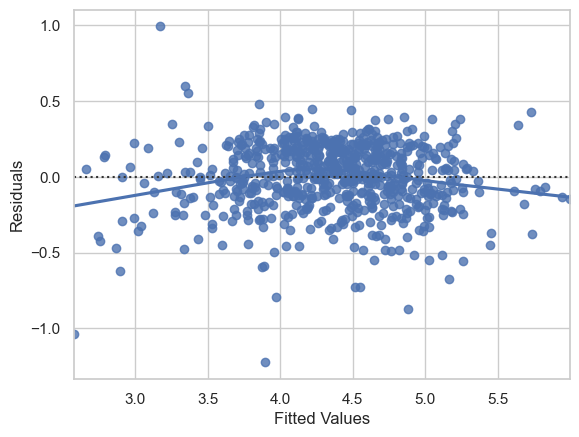

In [169]:
sns.set_style("whitegrid")
sns.residplot(df_pred,x="Fitted_values",y="Residuals",lowess=True);
plt.xlabel("Fitted Values");
plt.ylabel("Residuals");

* We can observe a pattern in the residual vs fitted values, hence we will try to transform the continous variables in the data.

In [170]:
x_train3.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram',
       'days_used', 'normalized_new_price', 'years_used', 'brand_name_Vivo',
       '5g_yes'],
      dtype='object')

/Users/saisampath/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


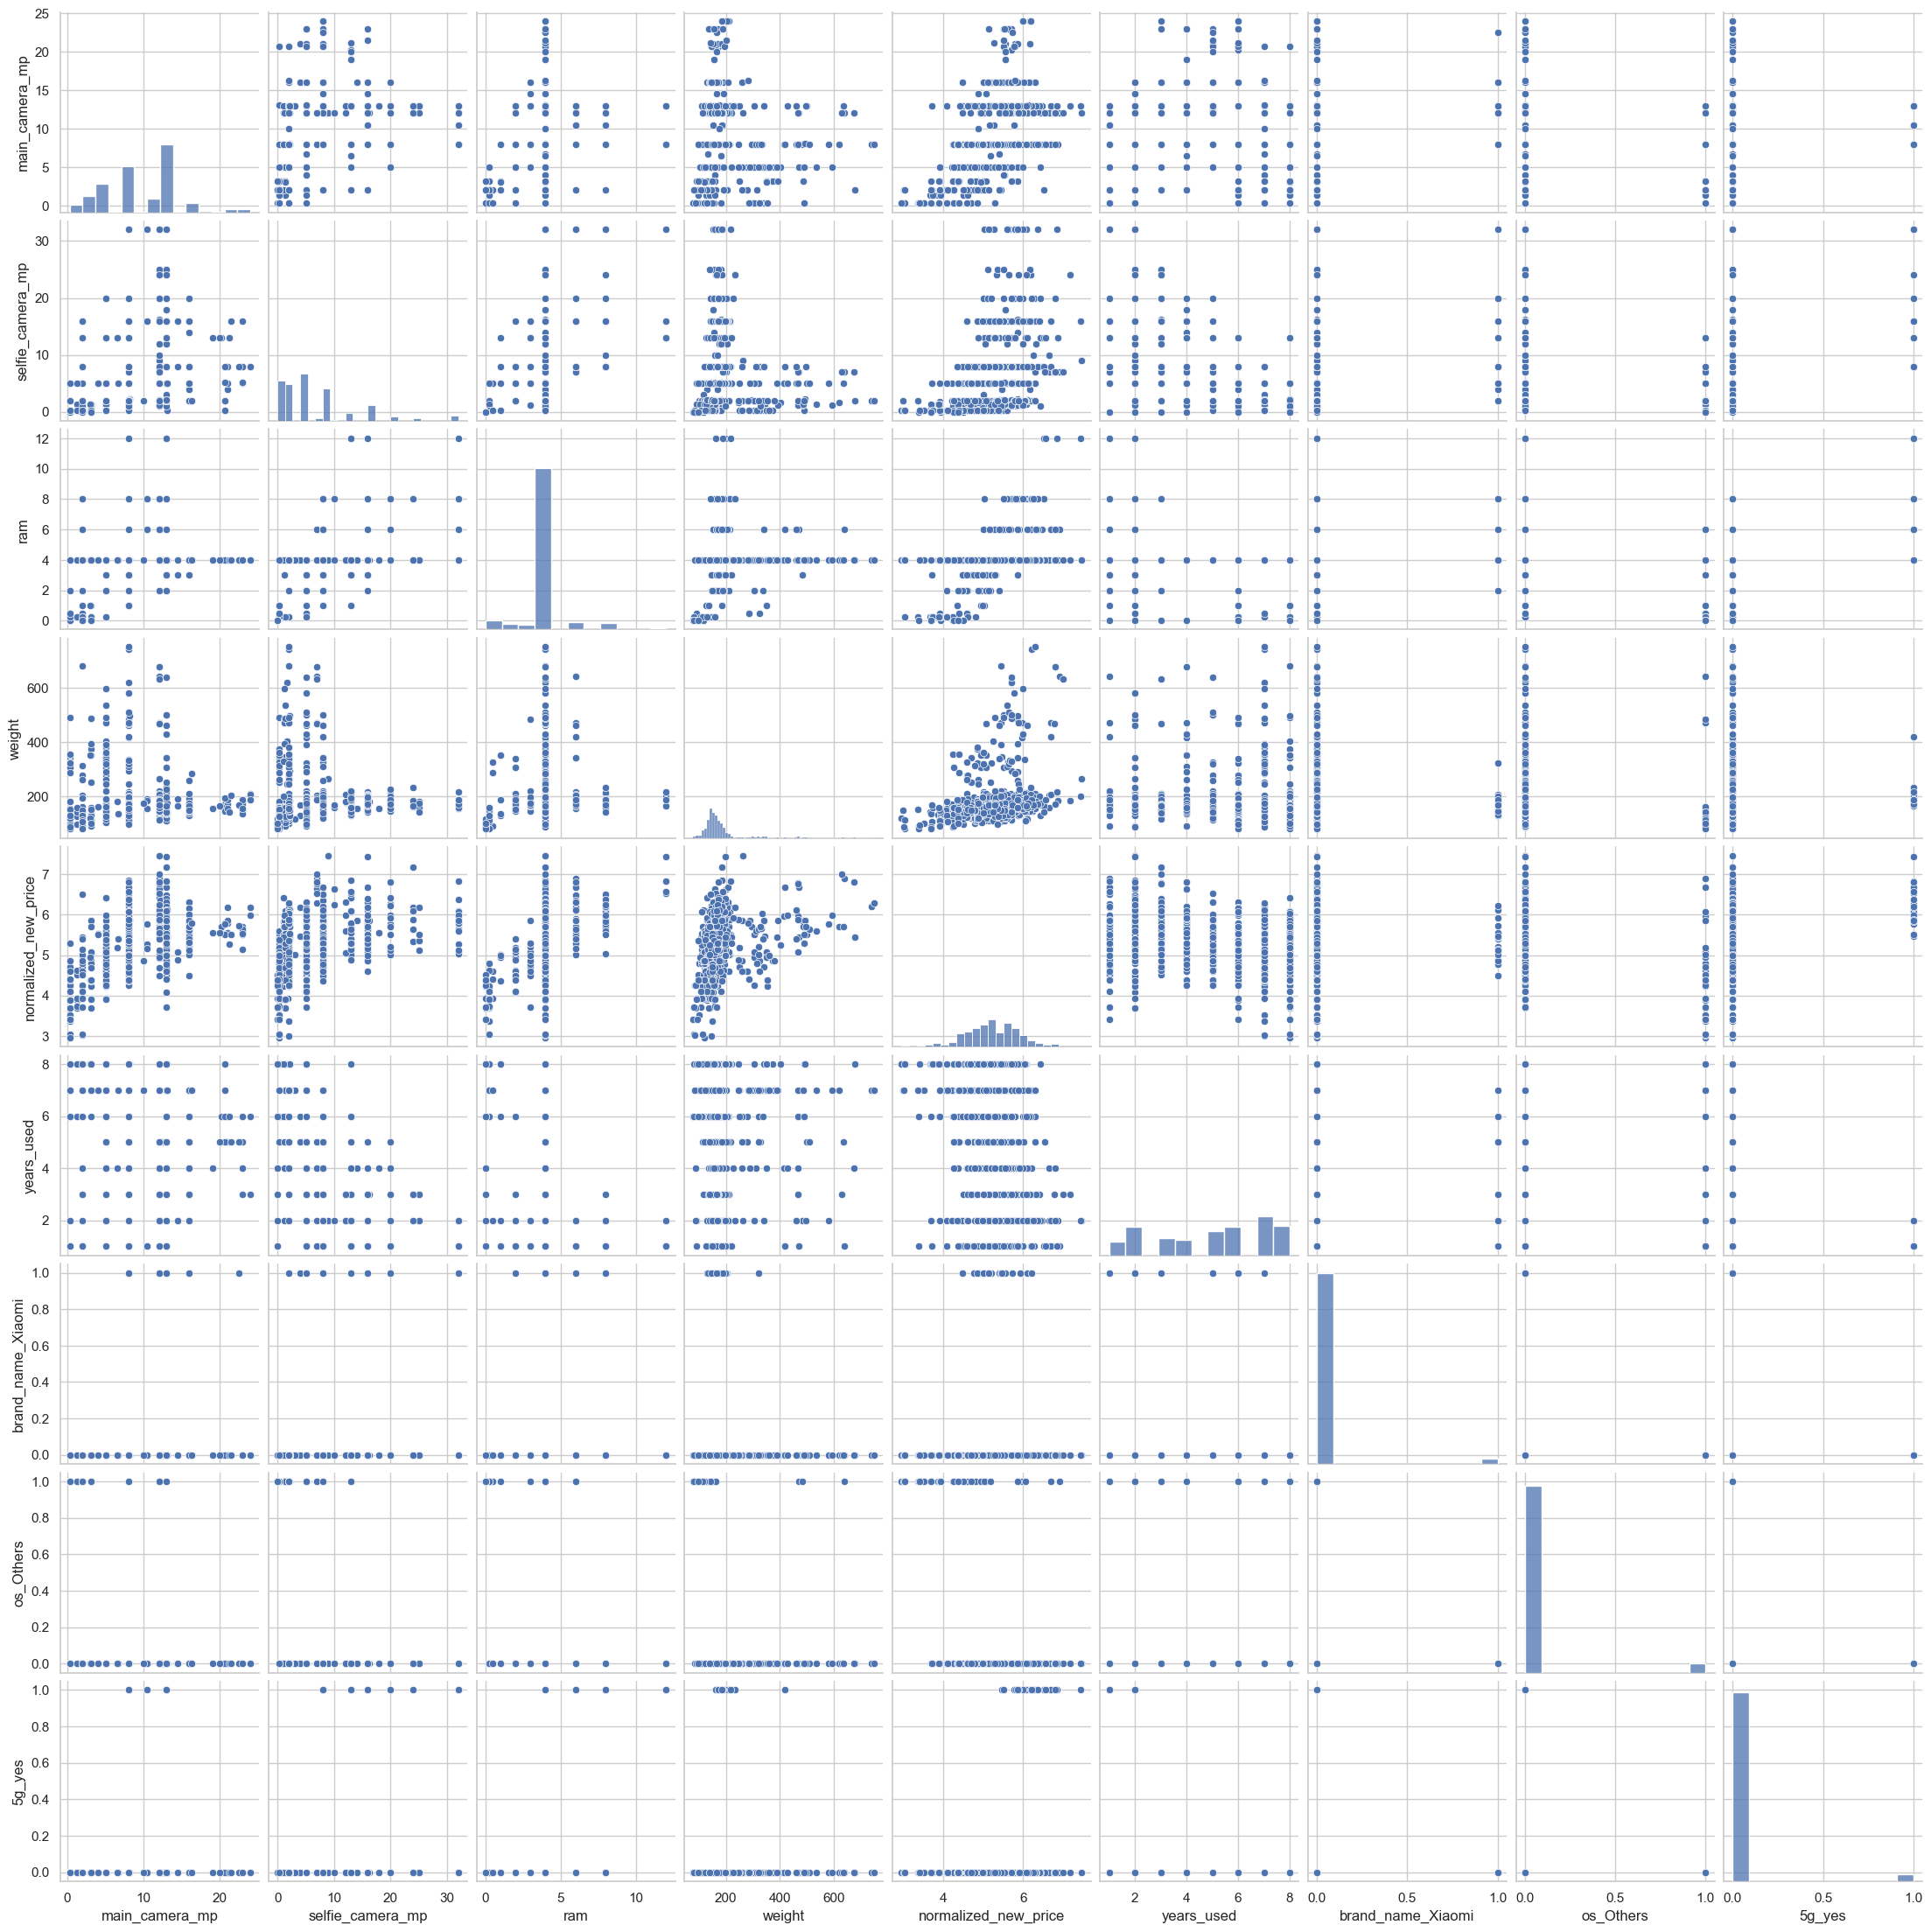

In [171]:
sns.pairplot(x_train[['main_camera_mp', 'selfie_camera_mp', 'ram', 'weight',
       'normalized_new_price', 'years_used', 'brand_name_Xiaomi', 'os_Others',
       '5g_yes']]);
plt.show()

In [172]:
df_pred_1= pd.DataFrame()
df_pred_1["Actual_values"]=y_train.values.flatten()
df_pred_1["Fitted_values"]=olsmodel_3.fittedvalues.values
df_pred_1["Residuals"]=olsmodel_3.resid.values

df_pred.head()

,Actual_values,Fitted_values,Residuals
0,4.271933,4.661273,-0.389341
1,3.950282,3.758026,0.192256
2,3.916214,4.155310,-0.239096
3,4.808845,4.664817,0.144029
4,4.411828,4.436689,-0.024861


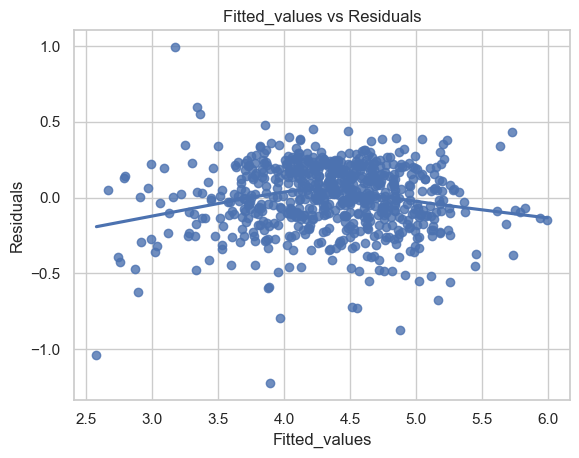

In [173]:
sns.regplot(df_pred_1,x="Fitted_values",y="Residuals",lowess=True);
plt.title("Fitted_values vs Residuals");

* We observe that the pattern has slightly decreased and the data points seems to be randomly distributed.


### TEST FOR NORMALITY

**What is the test?**

* Error terms/residuals should be normally distributed.

* If the error terms are not normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What does non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to check the Normality?**

* It can be checked via QQ Plot - residuals following normal distribution will make a straight line plot, otherwise not.

* Another test to check for normality is the Shapiro-Wilk test.

**How to Make residuals normal?**

* We can apply transformations like log, exponential, arcsinh, etc as per our data.

<Axes: xlabel='Residuals', ylabel='Count'>

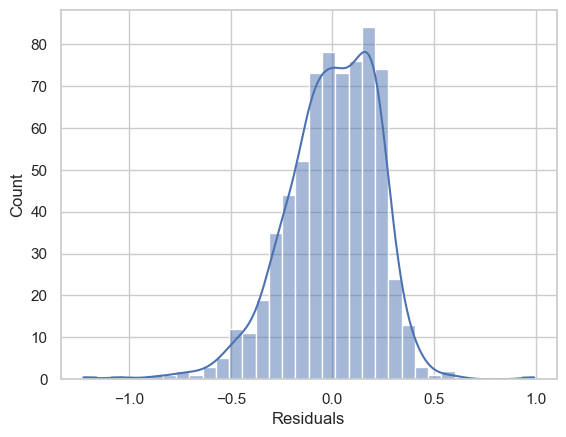

In [174]:
sns.histplot(df_pred_1["Residuals"],kde=True)

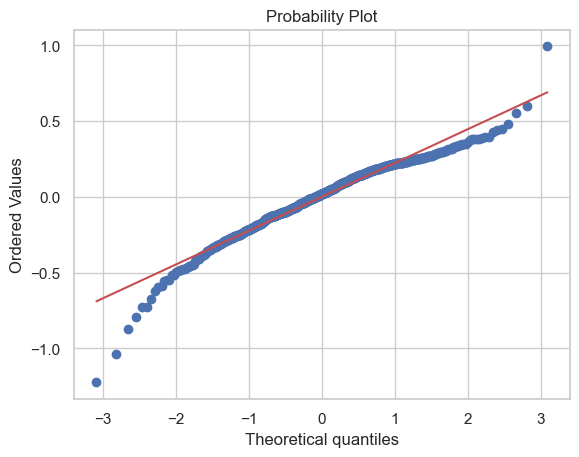

In [175]:
import pylab
import scipy.stats as stats
stats.probplot(df_pred_1["Residuals"], dist="norm", plot=pylab)
plt.show()

The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

* Null hypothesis - Data is normally distributed.
* Alternate hypothesis - Data is not normally distributed.

In [176]:
stats.shapiro(df_pred_1["Residuals"])

ShapiroResult(statistic=0.9630586504936218, pvalue=3.594545884902378e-12)

* Since p-value < 0.05, the residuals are not normal as per shapiro test.
* Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

### TEST FOR HOMOSCEDASTICITY

* **Homoscedacity** - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* **Heteroscedacity** - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check if model has Heteroscedasticity?**

* Can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.

**How to deal with Heteroscedasticity?**

* Can be fixed via adding other important features or making transformations.

The null and alternate hypotheses of the goldfeldquandt test are as follows:

* Null hypothesis : Residuals are homoscedastic
* Alternate hypothesis : Residuals have hetroscedasticity

In [177]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 0.8806701182173048), ('p-value', 0.8773098390448457)]

* Since p-value > 0.05 we can say that the residuals are homoscedastic.

## Final Model

In [178]:
olsmodel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.853
Model:                               OLS   Adj. R-squared:                  0.851
Method:                    Least Squares   F-statistic:                     439.7
Date:                   Thu, 21 Mar 2024   Prob (F-statistic):          1.25e-276
Time:                           09:32:43   Log-Likelihood:                 43.895
No. Observations:                    690   AIC:                            -67.79
Df Residuals:                        680   BIC:                            -22.42
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2502      0.083     15.010      0.000       1.087       1.414
screen_size              0.0426      0.003     15.673      0.000       0.037       0.048
main_camera_mp           0.0209      0.002      8.644      0.000       0.016       0.026
selfie_camera_mp         0.0132      0.002      6.722      0.000       0.009       0.017
ram                      0.0317      0.009      3.639      0.000       0.015       0.049
days_used                0.0001   5.46e-05      1.982      0.048    1.04e-06       0.000
normalized_new_price     0.4217      0.020     21.142      0.000       0.383       0.461
years_used              -0.0324      0.007     -4.593      0.000      -0.046      -0.019
brand_name_Vivo         -0.1072      0.049     -2.193      0.029      -0.203      -0.011
5g_yes                  -0.1698      0.060     -2.849      0.005      -0.287      -0.053
==============================================================================
Omnibus:                       91.701   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.588
Skew:                          -0.734   Prob(JB):                     8.37e-46
Kurtosis:                       5.250   Cond. No.                     6.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
oslmodel_test=sm.OLS(y_test,x_test3).fit()
oslmodel_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.836
Model:                               OLS   Adj. R-squared:                  0.836
Method:                    Least Squares   F-statistic:                     1563.
Date:                   Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                           09:32:43   Log-Likelihood:                 47.337
No. Observations:                   2764   AIC:                            -74.67
Df Residuals:                       2754   BIC:                            -15.43
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2356      0.043     28.852      0.000       1.152       1.320
screen_size              0.0426      0.001     29.415      0.000       0.040       0.045
main_camera_mp           0.0200      0.001     16.108      0.000       0.018       0.022
selfie_camera_mp         0.0131      0.001     12.678      0.000       0.011       0.015
ram                      0.0166      0.005      3.564      0.000       0.007       0.026
days_used              6.24e-05   2.84e-05      2.198      0.028    6.73e-06       0.000
normalized_new_price     0.4375      0.010     43.963      0.000       0.418       0.457
years_used              -0.0255      0.004     -6.940      0.000      -0.033      -0.018
brand_name_Vivo         -0.0254      0.026     -0.987      0.324      -0.076       0.025
5g_yes                  -0.0307      0.028     -1.096      0.273      -0.086       0.024
==============================================================================
Omnibus:                      226.950   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              508.182
Skew:                          -0.511   Prob(JB):                    4.46e-111
Kurtosis:                       4.835   Cond. No.                     6.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predictions

In [180]:
olsmodel_3.params

const                   1.250182
screen_size             0.042605
main_camera_mp          0.020912
selfie_camera_mp        0.013220
ram                     0.031680
days_used               0.000108
normalized_new_price    0.421669
years_used             -0.032386
brand_name_Vivo        -0.107212
5g_yes                 -0.169832
dtype: float64

In [181]:
y_pred= olsmodel_3.predict(x_test3)
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
rmse_test

0.24007486250573323

In [182]:
rmse_train=np.sqrt(mean_squared_error(y_train,df_pred["Fitted_values"]))
rmse_train

0.22705707872642897

In [183]:
mae_test = mean_absolute_error(y_test,y_pred)
mae_test

0.18695142307527485

In [184]:
mae_train=mean_absolute_error(y_train,df_pred["Fitted_values"])
mae_train

0.17680832501289043

* We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
* MAE indicates that our current model is able to predict normalized_used_price within a mean error of 0.18 units on the test data.
* Hence, we can conclude the model "olsmodel_3" is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations 

- Newly released phones have high used price, which makes sense because the newer the phone, the higher the new price hence used price would be affected and the older the phone, the lower the used price. since most customers want phones in demand.

- years_used, brand_name_Motorola, brand_name_Nokia, brand_name_Realme, whether 4g or 5g seem to be affect the used price. this is understandable the longer the phone is used, we cant determine its originality and its wholeness hence a decrease in used price which negatively impacts the amount it could be sold for used. 

- Phones with 5g and brand_name_Vivo phones have lower the used price. they seem to not be a demand for customers and should probably be discontinued.

---------------
### RECOMMENDATIONS

- We can use the model to make predictions of the price of used phone. Newly released phones should also be focused on as they have a high resale price. I recommend discontinuation of brand_name_Vivo with 5g_yes.

- Future data collections need to be done on the age of customers purchasing products, since age could be a major drive. millenial customers may tend to want a 5g or a newer version.

- Future data collection on income could also be done to know what more high income customer want.